# Vessel Performance Model

### Phase 1: Data Exploration and Preprocessing

In [1]:
import pandas as pd
df = pd.read_json("vesselPerformance-Sample.json")
df.head()

AirPressure  AirTemperature  AnchorageName  \
0       1016.0            21.0            NaN   
1          NaN             NaN            NaN   
2          NaN             NaN            NaN   
3          NaN             NaN            NaN   
4          NaN             NaN            NaN   

                                    AuxiliaryBlowers  AverageSpeedGPS  \
0  [{'Ampere': None, 'IDCode': 'AuxiliaryBlower3'...            11.92   
1                                                NaN              NaN   
2                                                 []              NaN   
3                                                 []              NaN   
4                                                 []              NaN   

   AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0            12.46       25650.0                            NaN   
1              NaN       25650.0                            NaN   
2              NaN       25650.0                            NaN   
3              NaN       25650.0                            NaN   
4              NaN       25650.0                            NaN   

   BoilerIsExhaustBypassActive  CargoMetricTons  ...  DraftNextPort  \
0                          0.0              0.0  ...            NaN   
1                          NaN              NaN  ...            NaN   
2                          0.0              0.0  ...            NaN   
3                          0.0              0.0  ...            NaN   
4                          0.0              0.0  ...            NaN   

  EstimatedBunkersNextPort EstimatedTimeOfArrival  IsMainEngineRunning  \
0                      NaN                    NaN                  NaN   
1                      NaN                    NaN                  NaN   
2                      NaN                    NaN                  NaN   
3                      NaN                    NaN                  NaN   
4                      NaN                    NaN                  NaN   

   MetacentricHeight  ShearForcesInPercent  StandByEngineTime  \
0                NaN                   NaN                NaN   
1                NaN                   NaN                NaN   
2                NaN                   NaN                NaN   
3                NaN                   NaN                NaN   
4                NaN                   NaN                NaN   

   TorsionMomentsInPercent  DistanceToEosp  SailedDistance  
0                      NaN             NaN             NaN  
1                      NaN             NaN             NaN  
2                      NaN             NaN             NaN  
3                      NaN             NaN             NaN  
4                      NaN             NaN             NaN  

[5 rows x 136 columns]

In [2]:
df=pd.DataFrame(df)
df.head()

AirPressure  AirTemperature  AnchorageName  \
0       1016.0            21.0            NaN   
1          NaN             NaN            NaN   
2          NaN             NaN            NaN   
3          NaN             NaN            NaN   
4          NaN             NaN            NaN   

                                    AuxiliaryBlowers  AverageSpeedGPS  \
0  [{'Ampere': None, 'IDCode': 'AuxiliaryBlower3'...            11.92   
1                                                NaN              NaN   
2                                                 []              NaN   
3                                                 []              NaN   
4                                                 []              NaN   

   AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0            12.46       25650.0                            NaN   
1              NaN       25650.0                            NaN   
2              NaN       25650.0                            NaN   
3              NaN       25650.0                            NaN   
4              NaN       25650.0                            NaN   

   BoilerIsExhaustBypassActive  CargoMetricTons  ...  DraftNextPort  \
0                          0.0              0.0  ...            NaN   
1                          NaN              NaN  ...            NaN   
2                          0.0              0.0  ...            NaN   
3                          0.0              0.0  ...            NaN   
4                          0.0              0.0  ...            NaN   

  EstimatedBunkersNextPort EstimatedTimeOfArrival  IsMainEngineRunning  \
0                      NaN                    NaN                  NaN   
1                      NaN                    NaN                  NaN   
2                      NaN                    NaN                  NaN   
3                      NaN                    NaN                  NaN   
4                      NaN                    NaN                  NaN   

   MetacentricHeight  ShearForcesInPercent  StandByEngineTime  \
0                NaN                   NaN                NaN   
1                NaN                   NaN                NaN   
2                NaN                   NaN                NaN   
3                NaN                   NaN                NaN   
4                NaN                   NaN                NaN   

   TorsionMomentsInPercent  DistanceToEosp  SailedDistance  
0                      NaN             NaN             NaN  
1                      NaN             NaN             NaN  
2                      NaN             NaN             NaN  
3                      NaN             NaN             NaN  
4                      NaN             NaN             NaN  

[5 rows x 136 columns]

In [3]:
x = list(df.columns)
x

['AirPressure',
 'AirTemperature',
 'AnchorageName',
 'AuxiliaryBlowers',
 'AverageSpeedGPS',
 'AverageSpeedLog',
 'BallastWater',
 'BoilerExhaustTemperatureAfter',
 'BoilerIsExhaustBypassActive',
 'CargoMetricTons',
 'ChartererSpeedOrder',
 'ChiefEngineerName',
 'Consumptions',
 'Containers',
 'Course',
 'CurrentDirection',
 'CurrentStrength',
 'DistanceFromLastPort',
 'DistanceToNextPort',
 'DistanceTravelledSinceLastReport',
 'DraftAFT',
 'DraftFWD',
 'DraftMid',
 'Engine',
 'EngineDriftingStoppageTime',
 'EngineRoomAirPressure',
 'EngineRoomAirTemperature',
 'EngineRoomRelativeAirHumidity',
 'EngineSlip',
 'EstimatedTimeOfCargoCompletion',
 'EstimatedTimeOfDepartureCurrentPort',
 'FuelRackPosition',
 'FuelRobs',
 'Generators',
 'ID',
 'IsCombinatorMode',
 'IsFuelChangeover',
 'IsPositionWarningOverridden',
 'IsShaftGeneratorRunning',
 'IsSlowSteaming',
 'IsTurboChargerCutOut',
 'Latitude',
 'Load',
 'Longitude',
 'MainEngineCylinderOil',
 'MainEngineSecondCylinderOil',
 'MasterName

#### Handling nested fields 

In [4]:
listdict_col_names = ['AuxiliaryBlowers' ,  'OtherRobs' , 'MainEngines' , 'Consumptions' , 'FuelRobs' , 'Generators']
commasep_list = ['ChiefEngineerName' ,  'MasterName']
hyphensep_list = ['FromPortCode' ,  'ToPortCode' ]
dict_col_names = ['Load' , 'Longitude' , 'MainEngineCylinderOil' , 'MainEngineSecondCylinderOil' , 'Draft' , 'DraftNextPort' , 'Engine' , 'Latitude']

In [5]:
listdict_col_names = ['AuxiliaryBlowers' ,  'OtherRobs' , 'MainEngines' , 'Consumptions' , 'FuelRobs' , 'Generators']


def listdict_to_col(x):
    global df
    for list1 in list(x):
        if isinstance(list1, list) and list1:
            for dic in list1:
                if isinstance(dic, dict):
                    for key, value in dic.items():
                        if pd.notna(value):
                             df.loc[:, key] = value

    return df




for feature in listdict_col_names :
   df = listdict_to_col(df[feature])
   df = df.drop(feature, axis=1)



In [6]:
def dict_to_col(x , col_name):
      for dic in list(x):
            if isinstance(dic, dict):
                for key, value in dic.items():
                      if pd.notna(value):
                          df[key] = value


      return df

for feature in dict_col_names :
    df = dict_to_col(df[feature] , feature)
    df = df.drop(feature, axis=1)

In [7]:
def comma_sep(x , col_name):
    for i in list(x):

        if pd.notna(i) and isinstance(i, str):
            li = i.split(",")

            if len(li) >= 2:
                df[col_name + '-1'] = li[0]
                df[col_name + '-2'] = li[1]
            else:

                df[col_name +'-1'] = li[0]
                df[col_name +'-2'] = None
        else:

            df[col_name +'-1'] = None
            df[col_name +'-2'] = None


    return df

for feature in commasep_list :
    df = comma_sep(df[feature] , feature)
    df = df.drop(feature, axis=1)

In [8]:

def hyphen_sep(x , col_name):
    new_temp_values = []
    for i in list(x):
        if isinstance(i, str) and i:
            li = i.split("-")
            if len(li) >= 2:
                new_temp_values.append(li[1])
            else:
                new_temp_values.append(li[0])
        else:
            new_temp_values.append(None)

    df['new_' + col_name] = new_temp_values

    return df

for feature in hyphensep_list :
   df =  hyphen_sep(df[feature] , feature)
   df = df.drop(feature, axis=1)

In [9]:
df

AirPressure  AirTemperature  AnchorageName  AverageSpeedGPS  \
0         1016.0            21.0            NaN            11.92   
1            NaN             NaN            NaN              NaN   
2            NaN             NaN            NaN              NaN   
3            NaN             NaN            NaN              NaN   
4            NaN             NaN            NaN              NaN   
..           ...             ...            ...              ...   
680        996.0             2.0            NaN             9.62   
681        983.0             8.0            NaN            11.17   
682        999.0            10.0            NaN            11.67   
683        999.0            10.0            NaN            12.26   
684       1015.0             7.0            NaN            11.79   

     AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0              12.46       24766.0                            NaN   
1                NaN       24766.0                            NaN   
2                NaN       24766.0                            NaN   
3                NaN       24766.0                            NaN   
4                NaN       24766.0                            NaN   
..               ...           ...                            ...   
680             9.62       24766.0                            NaN   
681            11.17       24766.0                            NaN   
682            11.67       24766.0                            NaN   
683            12.26       24766.0                            NaN   
684            11.79       24766.0                            NaN   

     BoilerIsExhaustBypassActive  CargoMetricTons  ChartererSpeedOrder  ...  \
0                            0.0              0.0                 12.0  ...   
1                            NaN              NaN                  NaN  ...   
2                            0.0              0.0                 12.0  ...   
3                            0.0              0.0                 12.0  ...   
4                            0.0              0.0                 12.0  ...   
..                           ...              ...                  ...  ...   
680                          0.0              NaN                 13.0  ...   
681                          0.0              NaN                 13.0  ...   
682                          0.0              NaN                 13.0  ...   
683                          0.0              NaN                 13.0  ...   
684                          0.0              NaN                 13.0  ...   

     PowerAtShaftRelative  RunningHours  SpeedThroughWater  SpeedOverGround  \
0                   76.98          24.0                0.0              0.0   
1                   76.98          24.0                0.0              0.0   
2                   76.98          24.0                0.0              0.0   
3                   76.98          24.0                0.0              0.0   
4                   76.98          24.0                0.0              0.0   
..                    ...           ...                ...              ...   
680                 76.98          24.0                0.0              0.0   
681                 76.98          24.0                0.0              0.0   
682                 76.98          24.0                0.0              0.0   
683                 76.98          24.0                0.0              0.0   
684                 76.98          24.0                0.0              0.0   

     ChiefEngineerName-1  ChiefEngineerName-2  MasterName-1  MasterName-2  \
0                  LOJKO                Marek       ARBULIC       Cvijeto   
1                  LOJKO                Marek       ARBULIC       Cvijeto   
2                  LOJKO                Marek       ARBULIC       Cvijeto   
3                  LOJKO                Marek       ARBULIC       Cvijeto   
4                  LOJKO                Marek       ARBULIC       Cvijeto   

In [10]:
def PerformanceCodes(x):
    global df
    for i in list(x):

        if isinstance(i, list) and any(pd.notna(element) for element in i):
            df['Weather'] = i[0]

            break
    return df

df = PerformanceCodes(df['PerformanceCodes'])

In [11]:
df

AirPressure  AirTemperature  AnchorageName  AverageSpeedGPS  \
0         1016.0            21.0            NaN            11.92   
1            NaN             NaN            NaN              NaN   
2            NaN             NaN            NaN              NaN   
3            NaN             NaN            NaN              NaN   
4            NaN             NaN            NaN              NaN   
..           ...             ...            ...              ...   
680        996.0             2.0            NaN             9.62   
681        983.0             8.0            NaN            11.17   
682        999.0            10.0            NaN            11.67   
683        999.0            10.0            NaN            12.26   
684       1015.0             7.0            NaN            11.79   

     AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0              12.46       24766.0                            NaN   
1                NaN       24766.0                            NaN   
2                NaN       24766.0                            NaN   
3                NaN       24766.0                            NaN   
4                NaN       24766.0                            NaN   
..               ...           ...                            ...   
680             9.62       24766.0                            NaN   
681            11.17       24766.0                            NaN   
682            11.67       24766.0                            NaN   
683            12.26       24766.0                            NaN   
684            11.79       24766.0                            NaN   

     BoilerIsExhaustBypassActive  CargoMetricTons  ChartererSpeedOrder  ...  \
0                            0.0              0.0                 12.0  ...   
1                            NaN              NaN                  NaN  ...   
2                            0.0              0.0                 12.0  ...   
3                            0.0              0.0                 12.0  ...   
4                            0.0              0.0                 12.0  ...   
..                           ...              ...                  ...  ...   
680                          0.0              NaN                 13.0  ...   
681                          0.0              NaN                 13.0  ...   
682                          0.0              NaN                 13.0  ...   
683                          0.0              NaN                 13.0  ...   
684                          0.0              NaN                 13.0  ...   

     RunningHours  SpeedThroughWater  SpeedOverGround  ChiefEngineerName-1  \
0            24.0                0.0              0.0                LOJKO   
1            24.0                0.0              0.0                LOJKO   
2            24.0                0.0              0.0                LOJKO   
3            24.0                0.0              0.0                LOJKO   
4            24.0                0.0              0.0                LOJKO   
..            ...                ...              ...                  ...   
680          24.0                0.0              0.0                LOJKO   
681          24.0                0.0              0.0                LOJKO   
682          24.0                0.0              0.0                LOJKO   
683          24.0                0.0              0.0                LOJKO   
684          24.0                0.0              0.0                LOJKO   

     ChiefEngineerName-2  MasterName-1  MasterName-2  new_FromPortCode  \
0                  Marek       ARBULIC       Cvijeto             SGSIN   
1                  Marek       ARBULIC       Cvijeto             SGSIN   
2                  Marek       ARBULIC       Cvijeto             AUPHE   
3                  Marek       ARBULIC       Cvijeto             AUPHE   
4                  Marek       ARBULIC       Cvijeto             AUPHE   
..                   ...     

In [12]:

def convert_time_zone_to_ist(y, col_name):
    def convert_to_ist(time_zone):
        if pd.notna(time_zone) and isinstance(time_zone, str):
            hours_offset = 0
            minutes_offset = 0
            if '+' in time_zone:
                sign = 1
                parts = time_zone.split('+')[1].split(':')
            elif '-' in time_zone:
                sign = -1
                parts = time_zone.split('-')[1].split(':')
            if len(parts) == 2:
                hours_offset = sign * int(parts[0])
                minutes_offset = sign * int(parts[1])
            total_minutes_offset = hours_offset * 60 + minutes_offset
            total_minutes_offset += 330  
            new_hours = total_minutes_offset // 60
            new_minutes = total_minutes_offset % 60
            return f"{new_hours:02d}:{new_minutes:02d}"
        return None

   
    df['new_TimeZoneInfo'] = df[col_name].apply(convert_to_ist)
    
     
    df['new_TimeZoneInfo'] = df['new_TimeZoneInfo'].str.replace('-', '')
 
    df.drop(columns=[col_name], inplace=True)
    
    return df


df = convert_time_zone_to_ist(df["TimeZoneInfo"], 'TimeZoneInfo')


In [13]:
df

AirPressure  AirTemperature  AnchorageName  AverageSpeedGPS  \
0         1016.0            21.0            NaN            11.92   
1            NaN             NaN            NaN              NaN   
2            NaN             NaN            NaN              NaN   
3            NaN             NaN            NaN              NaN   
4            NaN             NaN            NaN              NaN   
..           ...             ...            ...              ...   
680        996.0             2.0            NaN             9.62   
681        983.0             8.0            NaN            11.17   
682        999.0            10.0            NaN            11.67   
683        999.0            10.0            NaN            12.26   
684       1015.0             7.0            NaN            11.79   

     AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0              12.46       24766.0                            NaN   
1                NaN       24766.0                            NaN   
2                NaN       24766.0                            NaN   
3                NaN       24766.0                            NaN   
4                NaN       24766.0                            NaN   
..               ...           ...                            ...   
680             9.62       24766.0                            NaN   
681            11.17       24766.0                            NaN   
682            11.67       24766.0                            NaN   
683            12.26       24766.0                            NaN   
684            11.79       24766.0                            NaN   

     BoilerIsExhaustBypassActive  CargoMetricTons  ChartererSpeedOrder  ...  \
0                            0.0              0.0                 12.0  ...   
1                            NaN              NaN                  NaN  ...   
2                            0.0              0.0                 12.0  ...   
3                            0.0              0.0                 12.0  ...   
4                            0.0              0.0                 12.0  ...   
..                           ...              ...                  ...  ...   
680                          0.0              NaN                 13.0  ...   
681                          0.0              NaN                 13.0  ...   
682                          0.0              NaN                 13.0  ...   
683                          0.0              NaN                 13.0  ...   
684                          0.0              NaN                 13.0  ...   

     SpeedThroughWater  SpeedOverGround  ChiefEngineerName-1  \
0                  0.0              0.0                LOJKO   
1                  0.0              0.0                LOJKO   
2                  0.0              0.0                LOJKO   
3                  0.0              0.0                LOJKO   
4                  0.0              0.0                LOJKO   
..                 ...              ...                  ...   
680                0.0              0.0                LOJKO   
681                0.0              0.0                LOJKO   
682                0.0              0.0                LOJKO   
683                0.0              0.0                LOJKO   
684                0.0              0.0                LOJKO   

     ChiefEngineerName-2  MasterName-1  MasterName-2  new_FromPortCode  \
0                  Marek       ARBULIC       Cvijeto             SGSIN   
1                  Marek       ARBULIC       Cvijeto             SGSIN   
2                  Marek       ARBULIC       Cvijeto             AUPHE   
3                  Marek       ARBULIC       Cvijeto             AUPHE   
4                  Marek       ARBULIC       Cvijeto             AUPHE   
..                   ...           ...           ...               ...   
680                Marek       ARBULIC       Cvijeto             JPWAK   
681                Marek       ARBULIC       Cvij

##### Identifying columns that contains all missing or null values("Unknown",NaN,0) and dropping them 

In [14]:
columns_with_all_unknown = df.columns[(df == "Unknown").all()]

columns_with_all_nan = df.columns[df.isnull().all()]

columns_with_all_zeros = df.columns[(df == 0).all()]

columns_to_drop = columns_with_all_unknown.union(columns_with_all_nan).union(columns_with_all_zeros)


df.drop(columns=columns_to_drop, inplace=True)




In [15]:
df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0         1016.0            21.0            11.92            12.46   
1            NaN             NaN              NaN              NaN   
2            NaN             NaN              NaN              NaN   
3            NaN             NaN              NaN              NaN   
4            NaN             NaN              NaN              NaN   
..           ...             ...              ...              ...   
680        996.0             2.0             9.62             9.62   
681        983.0             8.0            11.17            11.17   
682        999.0            10.0            11.67            11.67   
683        999.0            10.0            12.26            12.26   
684       1015.0             7.0            11.79            11.79   

     BallastWater  BoilerExhaustTemperatureAfter  BoilerIsExhaustBypassActive  \
0         24766.0                            NaN                          0.0   
1         24766.0                            NaN                          NaN   
2         24766.0                            NaN                          0.0   
3         24766.0                            NaN                          0.0   
4         24766.0                            NaN                          0.0   
..            ...                            ...                          ...   
680       24766.0                            NaN                          0.0   
681       24766.0                            NaN                          0.0   
682       24766.0                            NaN                          0.0   
683       24766.0                            NaN                          0.0   
684       24766.0                            NaN                          0.0   

     CargoMetricTons  ChartererSpeedOrder  Containers  ...  \
0                0.0                 12.0         0.0  ...   
1                NaN                  NaN         NaN  ...   
2                0.0                 12.0         0.0  ...   
3                0.0                 12.0         0.0  ...   
4                0.0                 12.0         0.0  ...   
..               ...                  ...         ...  ...   
680              NaN                 13.0         0.0  ...   
681              NaN                 13.0         0.0  ...   
682              NaN                 13.0         0.0  ...   
683              NaN                 13.0         0.0  ...   
684              NaN                 13.0         0.0  ...   

     PowerAtShaftRelative  RunningHours  ChiefEngineerName-1  \
0                   76.98          24.0                LOJKO   
1                   76.98          24.0                LOJKO   
2                   76.98          24.0                LOJKO   
3                   76.98          24.0                LOJKO   
4                   76.98          24.0                LOJKO   
..                    ...           ...                  ...   
680                 76.98          24.0                LOJKO   
681                 76.98          24.0                LOJKO   
682                 76.98          24.0                LOJKO   
683                 76.98          24.0                LOJKO   
684                 76.98          24.0                LOJKO   

     ChiefEngineerName-2  MasterName-1  MasterName-2  new_FromPortCode  \
0                  Marek       ARBULIC       Cvijeto             SGSIN   
1                  Marek       ARBULIC       Cvijeto             SGSIN   
2                  Marek       ARBULIC       Cvijeto             AUPHE   
3                  Marek       ARBULIC       Cvijeto             AUPHE   
4                  Marek       ARBULIC       Cvijeto             AUPHE   
..                   ...           ...           ...               ...   
680                Marek       ARBULIC       Cvijeto             JPWAK   
681                Marek       ARBULIC       Cvijeto             JPWAK   
682        

##### Dropping irrelevant Features

In [16]:
columns_to_drop = ['BoilerExhaustTemperatureAfter','BoilerIsExhaustBypassActive','Containers','FuelRackPosition','IsShaftGeneratorRunning','Course','DraftAFT','DraftFWD','DraftMid','ID','IsPositionWarningOverridden',
'SailedDistanceGPS','SeaStateInMetres','TurboChargerRPMAft','ValidationDate','VersionStamp','TurboChargerRPMFore','VITSetting','WindStrength','FirstPilotOnBoardTime','NoCargoOperation','Amount',
'ConsumptionTypeIDCode','AveragePowerAtShaft','FromPortID','ReportingPeriod','ToPortID','Amount','Viscosity','FuelOilTypeIDCode','AuxiliaryGeneratorID','AverageEnergyProducedPerHourRelative','Displacement',
'RPM','PowerAtShaft','PowerAtShaftRelative','RunHours','EnergyProducedInReportingPeriod','LubeOilConsumption','Minutes','Degrees','Guid','LastPilotAwayTime','LocalTime','WaterDepth',
'TurboChargerRPMMid','SailedDistanceLog','IsSlowSteaming','PerformanceCodes','Reefers','Boilers','Remark','ShaftGenerators','VesselID','SpecialVoyages','CurrentDirection','AverageShaftRevolutionsPerMinute',
'ChartererSpeedOrder','CIIConsumptions','DraftAft','DraftFwd','WaterDensity','DistanceSteamed','IsMainEngineRunning','TorsionMomentsInPercent','IDCode','RobTypeIDCode','BallastWater',
'AverageEnergyProducedPerHour','FuelTypeIDCode','EngineID','EventReportGuid','Slip' ,'LowerCalorificValue','EngineMaker','EngineModel','AccFactor','Bdn', 'Trim','ChiefEngineerName-1',
'ChiefEngineerName-2','SpecificConsumption','MasterName-1','MasterName-2','GeneratorType','Position','Sulphur','Temperature']

df.drop(columns=columns_to_drop, inplace=True)
df


AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0         1016.0            21.0            11.92            12.46   
1            NaN             NaN              NaN              NaN   
2            NaN             NaN              NaN              NaN   
3            NaN             NaN              NaN              NaN   
4            NaN             NaN              NaN              NaN   
..           ...             ...              ...              ...   
680        996.0             2.0             9.62             9.62   
681        983.0             8.0            11.17            11.17   
682        999.0            10.0            11.67            11.67   
683        999.0            10.0            12.26            12.26   
684       1015.0             7.0            11.79            11.79   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0                0.0              1.3                1660.0   
1                NaN              NaN                   NaN   
2                0.0              NaN                   NaN   
3                0.0              NaN                   NaN   
4                0.0              NaN                   NaN   
..               ...              ...                   ...   
680              NaN              0.5                3087.0   
681              NaN              1.0                3344.0   
682              NaN              1.0                3624.0   
683              NaN              0.8                3906.0   
684              NaN              1.0                4189.0   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0                  27.0                             286.0   
1                   NaN                               NaN   
2                   NaN                               NaN   
3                   NaN                               NaN   
4                   NaN                               NaN   
..                  ...                               ...   
680              1567.0                             231.0   
681              1310.0                             257.0   
682              1030.0                             280.0   
683               748.0                             282.0   
684               465.0                             283.0   

     EngineDriftingStoppageTime  ...  SailedDistance  \
0                      0.000000  ...             NaN   
1                           NaN  ...             NaN   
2                     22.083333  ...             NaN   
3                     24.000000  ...             NaN   
4                     24.000000  ...             NaN   
..                          ...  ...             ...   
680                    0.000000  ...             NaN   
681                    0.000000  ...             NaN   
682                    0.000000  ...             NaN   
683                    0.000000  ...             NaN   
684                    0.000000  ...             NaN   

     RunningHoursCounterValue  EnergyProducedCounterValue  \
0                     29601.0                  52104000.0   
1                     29601.0                  52104000.0   
2                     29601.0                  52104000.0   
3                     29601.0                  52104000.0   
4                     29601.0                  52104000.0   
..                        ...                         ...   
680                   29601.0                  52104000.0   
681                   29601.0                  52104000.0   
682                   29601.0                  52104000.0   
683                   29601.0                  52104000.0   
684                   29601.0                  52104000.0   

     EnergyProducedInReportPeriod  Consumption  RunningHours  \
0                        121300.0         70.0          24.0   
1                        121300.0         70.0          24.0   
2                        121300.0         70.0          24.0   
3           

In [17]:
def replace_null_with_mean(df, columns):
    for column in columns:
        if df[column].dtype != 'object': 
            df[column].fillna(df[column].mean(), inplace=True)
    return df

columns_to_replace = ['DistanceTravelledSinceLastReport','TotalCylinderOilConsumption','TotalCylinderOilSpecificConsumption','AirPressure','AirTemperature','CargoMetricTons']

df = replace_null_with_mean(df, columns_to_replace)
df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0            11.92            12.46   
1    1010.523944            22.4              NaN              NaN   
2    1010.523944            22.4              NaN              NaN   
3    1010.523944            22.4              NaN              NaN   
4    1010.523944            22.4              NaN              NaN   
..           ...             ...              ...              ...   
680   996.000000             2.0             9.62             9.62   
681   983.000000             8.0            11.17            11.17   
682   999.000000            10.0            11.67            11.67   
683   999.000000            10.0            12.26            12.26   
684  1015.000000             7.0            11.79            11.79   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000              1.3                1660.0   
1        46428.79321              NaN                   NaN   
2            0.00000              NaN                   NaN   
3            0.00000              NaN                   NaN   
4            0.00000              NaN                   NaN   
..               ...              ...                   ...   
680      46428.79321              0.5                3087.0   
681      46428.79321              1.0                3344.0   
682      46428.79321              1.0                3624.0   
683      46428.79321              0.8                3906.0   
684      46428.79321              1.0                4189.0   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0                  27.0                        286.000000   
1                   NaN                        219.731646   
2                   NaN                        219.731646   
3                   NaN                        219.731646   
4                   NaN                        219.731646   
..                  ...                               ...   
680              1567.0                        231.000000   
681              1310.0                        257.000000   
682              1030.0                        280.000000   
683               748.0                        282.000000   
684               465.0                        283.000000   

     EngineDriftingStoppageTime  ...  SailedDistance  \
0                      0.000000  ...             NaN   
1                           NaN  ...             NaN   
2                     22.083333  ...             NaN   
3                     24.000000  ...             NaN   
4                     24.000000  ...             NaN   
..                          ...  ...             ...   
680                    0.000000  ...             NaN   
681                    0.000000  ...             NaN   
682                    0.000000  ...             NaN   
683                    0.000000  ...             NaN   
684                    0.000000  ...             NaN   

     RunningHoursCounterValue  EnergyProducedCounterValue  \
0                     29601.0                  52104000.0   
1                     29601.0                  52104000.0   
2                     29601.0                  52104000.0   
3                     29601.0                  52104000.0   
4                     29601.0                  52104000.0   
..                        ...                         ...   
680                   29601.0                  52104000.0   
681                   29601.0                  52104000.0   
682                   29601.0                  52104000.0   
683                   29601.0                  52104000.0   
684                   29601.0                  52104000.0   

     EnergyProducedInReportPeriod  Consumption  RunningHours  \
0                        121300.0         70.0          24.0   
1                        121300.0         70.0          24.0   
2                        121300.0         70.0          24.0   
3           

In [18]:
import random
observed_values = df['SailedDistance'].dropna().unique()

df['SailedDistance'] = df['SailedDistance'].apply(
    lambda x: random.choice(observed_values) if pd.isnull(x) else x
)
df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0            11.92            12.46   
1    1010.523944            22.4              NaN              NaN   
2    1010.523944            22.4              NaN              NaN   
3    1010.523944            22.4              NaN              NaN   
4    1010.523944            22.4              NaN              NaN   
..           ...             ...              ...              ...   
680   996.000000             2.0             9.62             9.62   
681   983.000000             8.0            11.17            11.17   
682   999.000000            10.0            11.67            11.67   
683   999.000000            10.0            12.26            12.26   
684  1015.000000             7.0            11.79            11.79   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000              1.3                1660.0   
1        46428.79321              NaN                   NaN   
2            0.00000              NaN                   NaN   
3            0.00000              NaN                   NaN   
4            0.00000              NaN                   NaN   
..               ...              ...                   ...   
680      46428.79321              0.5                3087.0   
681      46428.79321              1.0                3344.0   
682      46428.79321              1.0                3624.0   
683      46428.79321              0.8                3906.0   
684      46428.79321              1.0                4189.0   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0                  27.0                        286.000000   
1                   NaN                        219.731646   
2                   NaN                        219.731646   
3                   NaN                        219.731646   
4                   NaN                        219.731646   
..                  ...                               ...   
680              1567.0                        231.000000   
681              1310.0                        257.000000   
682              1030.0                        280.000000   
683               748.0                        282.000000   
684               465.0                        283.000000   

     EngineDriftingStoppageTime  ...  SailedDistance  \
0                      0.000000  ...            35.0   
1                           NaN  ...            16.0   
2                     22.083333  ...            24.0   
3                     24.000000  ...            21.0   
4                     24.000000  ...             9.0   
..                          ...  ...             ...   
680                    0.000000  ...            46.0   
681                    0.000000  ...            35.0   
682                    0.000000  ...            27.0   
683                    0.000000  ...            27.0   
684                    0.000000  ...            12.0   

     RunningHoursCounterValue  EnergyProducedCounterValue  \
0                     29601.0                  52104000.0   
1                     29601.0                  52104000.0   
2                     29601.0                  52104000.0   
3                     29601.0                  52104000.0   
4                     29601.0                  52104000.0   
..                        ...                         ...   
680                   29601.0                  52104000.0   
681                   29601.0                  52104000.0   
682                   29601.0                  52104000.0   
683                   29601.0                  52104000.0   
684                   29601.0                  52104000.0   

     EnergyProducedInReportPeriod  Consumption  RunningHours  \
0                        121300.0         70.0          24.0   
1                        121300.0         70.0          24.0   
2                        121300.0         70.0          24.0   
3           

In [19]:
df_new=df.interpolate(method="linear",axis=0 )
df_new

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  SailedDistance  \
0                      0.000000  ...            35.0   
1                     11.041667  ...            16.0   
2                     22.083333  ...            24.0   
3                     24.000000  ...            21.0   
4                     24.000000  ...             9.0   
..                          ...  ...             ...   
680                    0.000000  ...            46.0   
681                    0.000000  ...            35.0   
682                    0.000000  ...            27.0   
683                    0.000000  ...            27.0   
684                    0.000000  ...            12.0   

     RunningHoursCounterValue  EnergyProducedCounterValue  \
0                     29601.0                  52104000.0   
1                     29601.0                  52104000.0   
2                     29601.0                  52104000.0   
3                     29601.0                  52104000.0   
4                     29601.0                  52104000.0   
..                        ...                         ...   
680                   29601.0                  52104000.0   
681                   29601.0                  52104000.0   
682                   29601.0                  52104000.0   
683                   29601.0                  52104000.0   
684                   29601.0                  52104000.0   

     EnergyProducedInReportPeriod  Consumption  RunningHours  \
0                        121300.0         70.0          24.0   
1                        121300.0         70.0          24.0   
2                        121300.0         70.0          24.0   
3           

In [20]:
df_new = df_new.loc[:, ~df_new.columns.duplicated()]

print("DataFrame after removing duplicate column names:")
df_new.shape

DataFrame after removing duplicate column names:


(685, 56)

In [21]:
main_df1 = pd.DataFrame(df_new)
main_df1.to_csv("Cleaned data befeore categorical encoding.csv", index=False)
print("\nCleaned dataset saved as Cleaned data before categorical encoding'.csv'")


Cleaned dataset saved as Cleaned data before categorical encoding'.csv'


##### Exploratory Data Analysis (EDA)


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 56 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AirPressure                                      685 non-null    float64
 1   AirTemperature                                   685 non-null    float64
 2   AverageSpeedGPS                                  685 non-null    float64
 3   AverageSpeedLog                                  685 non-null    float64
 4   CargoMetricTons                                  685 non-null    float64
 5   CurrentStrength                                  685 non-null    float64
 6   DistanceFromLastPort                             685 non-null    float64
 7   DistanceToNextPort                               685 non-null    float64
 8   DistanceTravelledSinceLastReport                 685 non-null    float64
 9   EngineDriftingStoppageTime      

In [23]:
df_new.shape

(685, 56)

In [24]:
summary_stats = df_new.describe()
summary_stats

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
count   685.000000      685.000000       685.000000       685.000000   
mean   1010.523944       22.400000        10.942657        11.685803   
std       6.581312        6.946033         3.519837         2.310909   
min     969.000000       -7.000000         0.000000         0.000000   
25%    1010.000000       22.400000        10.180769        11.220000   
50%    1010.523944       22.400000        11.257273        12.064615   
75%    1010.523944       27.000000        11.920000        13.000000   
max    1035.000000       35.000000        45.000000        27.430000   

       CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
count       685.000000       685.000000            685.000000   
mean      46428.793210         0.812847           1732.597080   
std       29179.282888         0.494931           1263.715893   
min           0.000000         0.000000              9.000000   
25%       46428.793210         0.440000            667.142857   
50%       46428.793210         0.753333           1372.000000   
75%       46428.793210         1.020000           2612.000000   
max       90809.000000         2.600000           4923.000000   

       DistanceToNextPort  DistanceTravelledSinceLastReport  \
count          685.000000                        685.000000   
mean          1061.254745                        219.731646   
std           1190.550153                         72.295948   
min           -365.000000                          0.000000   
25%             27.000000                        219.731646   
50%            602.000000                        219.731646   
75%           1836.200000                        267.000000   
max           4720.000000                        346.000000   

       EngineDriftingStoppageTime  ...  DischargedSludge  MetacentricHeight  \
count                  685.000000  ...        676.000000         676.000000   
mean                     6.956107  ...         29.127811           8.681620   
std                      9.575804  ...         63.329145           2.077649   
min                      0.000000  ...          0.000000           4.600000   
25%                      0.000000  ...          0.000000           7.042885   
50%                      0.000000  ...          7.382353           8.831571   
75%                     13.900000  ...         18.008025          10.395500   
max                     26.200000  ...        308.000000          12.530000   

       ShearForcesInPercent  DistanceToEosp  SailedDistance  \
count            676.000000      675.000000      685.000000   
mean              49.807692     2594.479259       30.848175   
std               12.698038     1247.839123       40.953979   
min               13.000000       86.000000        1.000000   
25%               41.784783     1508.125000        6.000000   
50%               50.019820     2644.571429       16.000000   
75%               59.516304     3666.227273       31.000000   
max               85.000000     4940.000000      188.000000   

       RunningHoursCounterValue  EnergyProducedCounterValue  \
count                     685.0                       685.0   
mean                    29601.0                  52104000.0   
std                         0.0                         0.0   
min                     29601.0                  52104000.0   
25%                     29601.0                  52104000.0   
50%                     29601.0                  52104000.0   
75%                     29601.0                  52104000.0   
max                     29601.0                  52104000.0   

       EnergyProducedInReportPeriod  Consumption  RunningHours  
count                         685.0        685.0         685.0  
mean                       121300.0         70.0          24.0  
std                             0.0          0.0           0.0  
min                        121300.0         70.0          24.0  
25%                        1213

#### Identifying Categorical Fields and Encoding them

In [25]:

categorical_fields = df_new.select_dtypes(include=['object']).columns.tolist()

print("\nCategorical fields in the DataFrame:")
print(categorical_fields)


Categorical fields in the DataFrame:
['EtaNextPort', 'ReportTypeIDCode', 'UtcTime', 'EstimatedTimeOfDeparture', 'FinishedWithEngineTime', 'EstimatedBunkersNextPort', 'EstimatedTimeOfArrival', 'StandByEngineTime', 'new_FromPortCode', 'new_ToPortCode', 'Weather', 'new_TimeZoneInfo']


In [26]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_fields=['EtaNextPort', 'FirstPilotOnBoardTime', 'Guid', 'LastPilotAwayTime', 'LocalTime', 'ReportTypeIDCode', 'UtcTime', 'ValidationDate', 'EstimatedTimeOfDeparture', 'FinishedWithEngineTime', 'EstimatedBunkersNextPort', 'EstimatedTimeOfArrival', 'StandByEngineTime', 'ConsumptionTypeIDCode', 'FuelOilTypeIDCode', 'new_FromPortCode', 'new_ToPortCode', 'Weather', 'new_TimeZoneInfo']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

list_fields = categorical_fields
for field in list_fields:
    if field in df_new.columns:
        df_new[field] = df_new[field].apply(lambda x: str(x) if isinstance(x, list) else x)

for field in categorical_fields:
    if field in df_new.columns:
        encoded_categories = encoder.fit_transform(df_new[[field]])
        encoded_df = pd.DataFrame(
            encoded_categories,
            columns=encoder.get_feature_names_out([field])
        )

       
        encoded_df.reset_index(drop=True, inplace=True)

        main_df = pd.concat([df_new.reset_index(drop=True), encoded_df], axis=1)

        main_df.drop(field, axis=1, inplace=True)
        
main_df



AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_13:30  \
0                      0.000000  ...                     1.0   
1                     11.041667  ...                     1.0   
2                     22.083333  ...                     1.0   
3                     24.000000  ...                     1.0   
4                     24.000000  ...                     1.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_14:30  new_TimeZoneInfo_15:30  new_TimeZoneInfo_16:30  \
0                       0.0                     0.0                     0.0   
1                       0.0                     0.0                     0.0   
2                       0.0                     0.0                     0.0   
3                       0.0                     0.0                     0.0   
4                       0.0                     0.0                     0.0   
..                      ...                     ...                     ...   
680                     0.0                     0.0                     0.0   
681                     0.0                     0.0                     0.0   
682                     0.0                     0.0                     0.0   
683                     0.0                     0.0                     0.0   
684                     0.0         

#### Distributions of main variables 

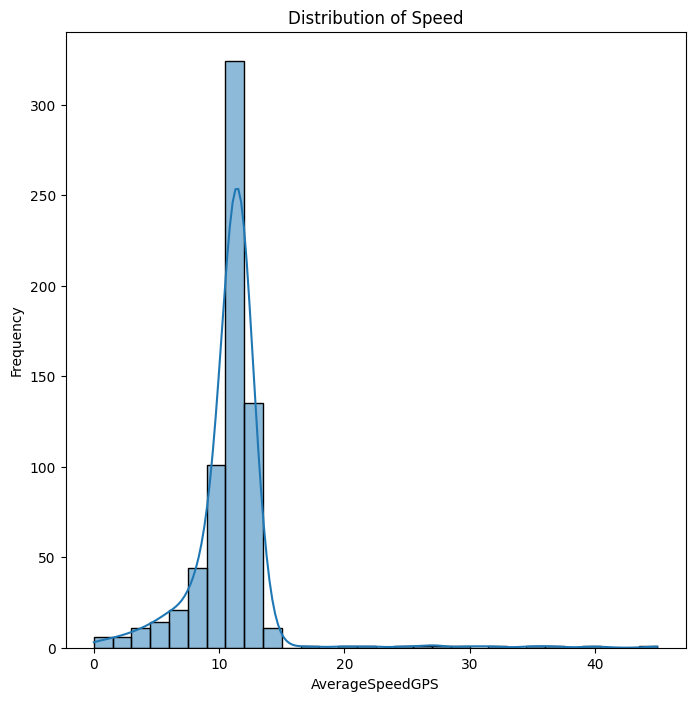

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_distribution(df, column, title):
    plt.figure(figsize=(8,8))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_distribution(main_df, 'AverageSpeedGPS', 'Distribution of Speed')



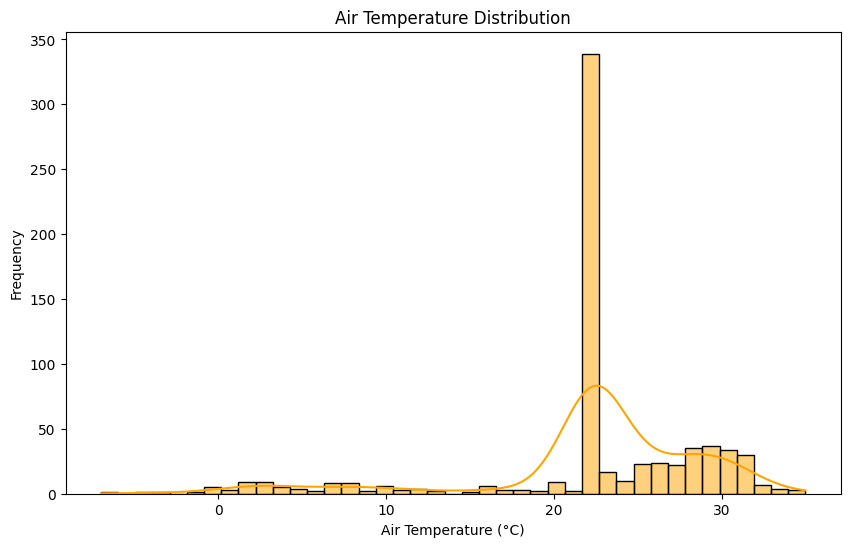

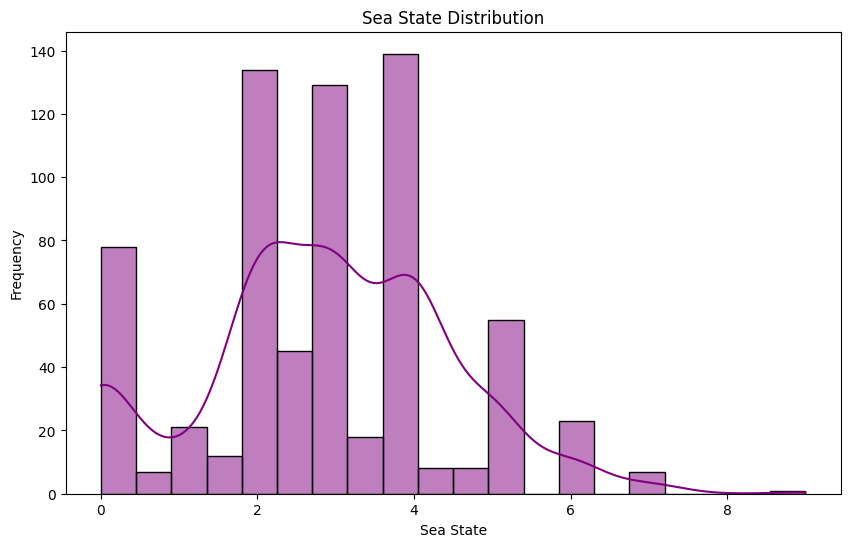

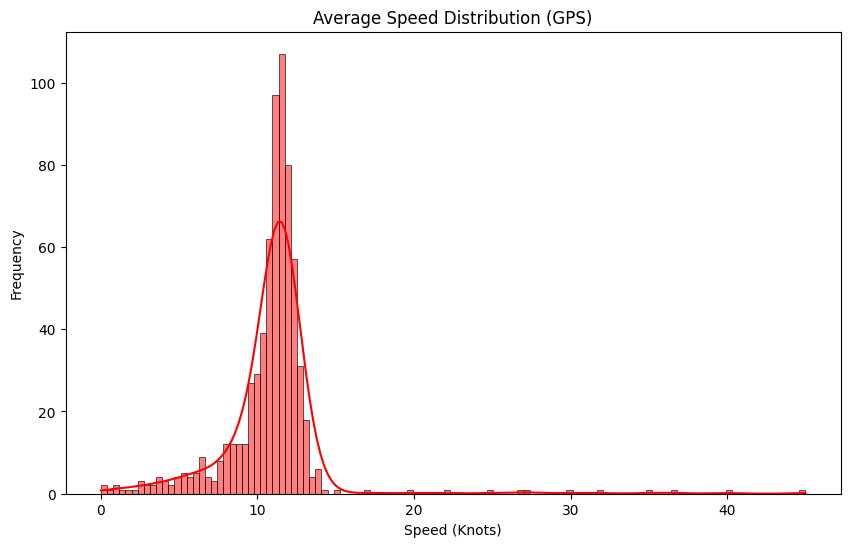

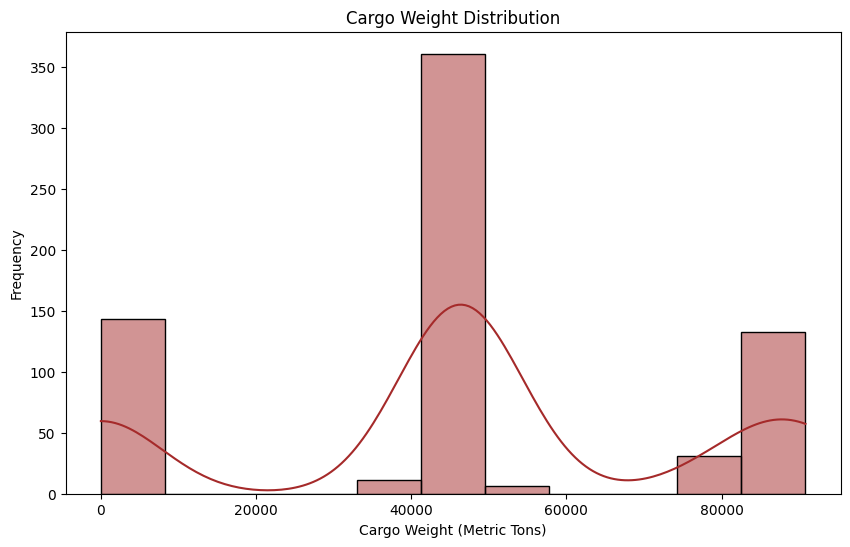

In [28]:
if "AirTemperature" in main_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new["AirTemperature"], kde=True, color="orange")
    plt.title("Air Temperature Distribution")
    plt.xlabel("Air Temperature (°C)")
    plt.ylabel("Frequency")
    plt.show()

if "WindStrength" in main_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new["WindStrength"], kde=True, color="green")
    plt.title("Wind Strength Distribution")
    plt.xlabel("Wind Strength (Beaufort Scale)")
    plt.ylabel("Frequency")
    plt.show()

if "SeaState" in main_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new["SeaState"], kde=True, color="purple")
    plt.title("Sea State Distribution")
    plt.xlabel("Sea State")
    plt.ylabel("Frequency")
    plt.show()

if "AverageSpeedGPS" in main_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new["AverageSpeedGPS"], kde=True, color="red")
    plt.title("Average Speed Distribution (GPS)")
    plt.xlabel("Speed (Knots)")
    plt.ylabel("Frequency")
    plt.show()

if "CargoMetricTons" in main_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new["CargoMetricTons"], kde=True, color="brown")
    plt.title("Cargo Weight Distribution")
    plt.xlabel("Cargo Weight (Metric Tons)")
    plt.ylabel("Frequency")
    plt.show()



#### Correlation matrix

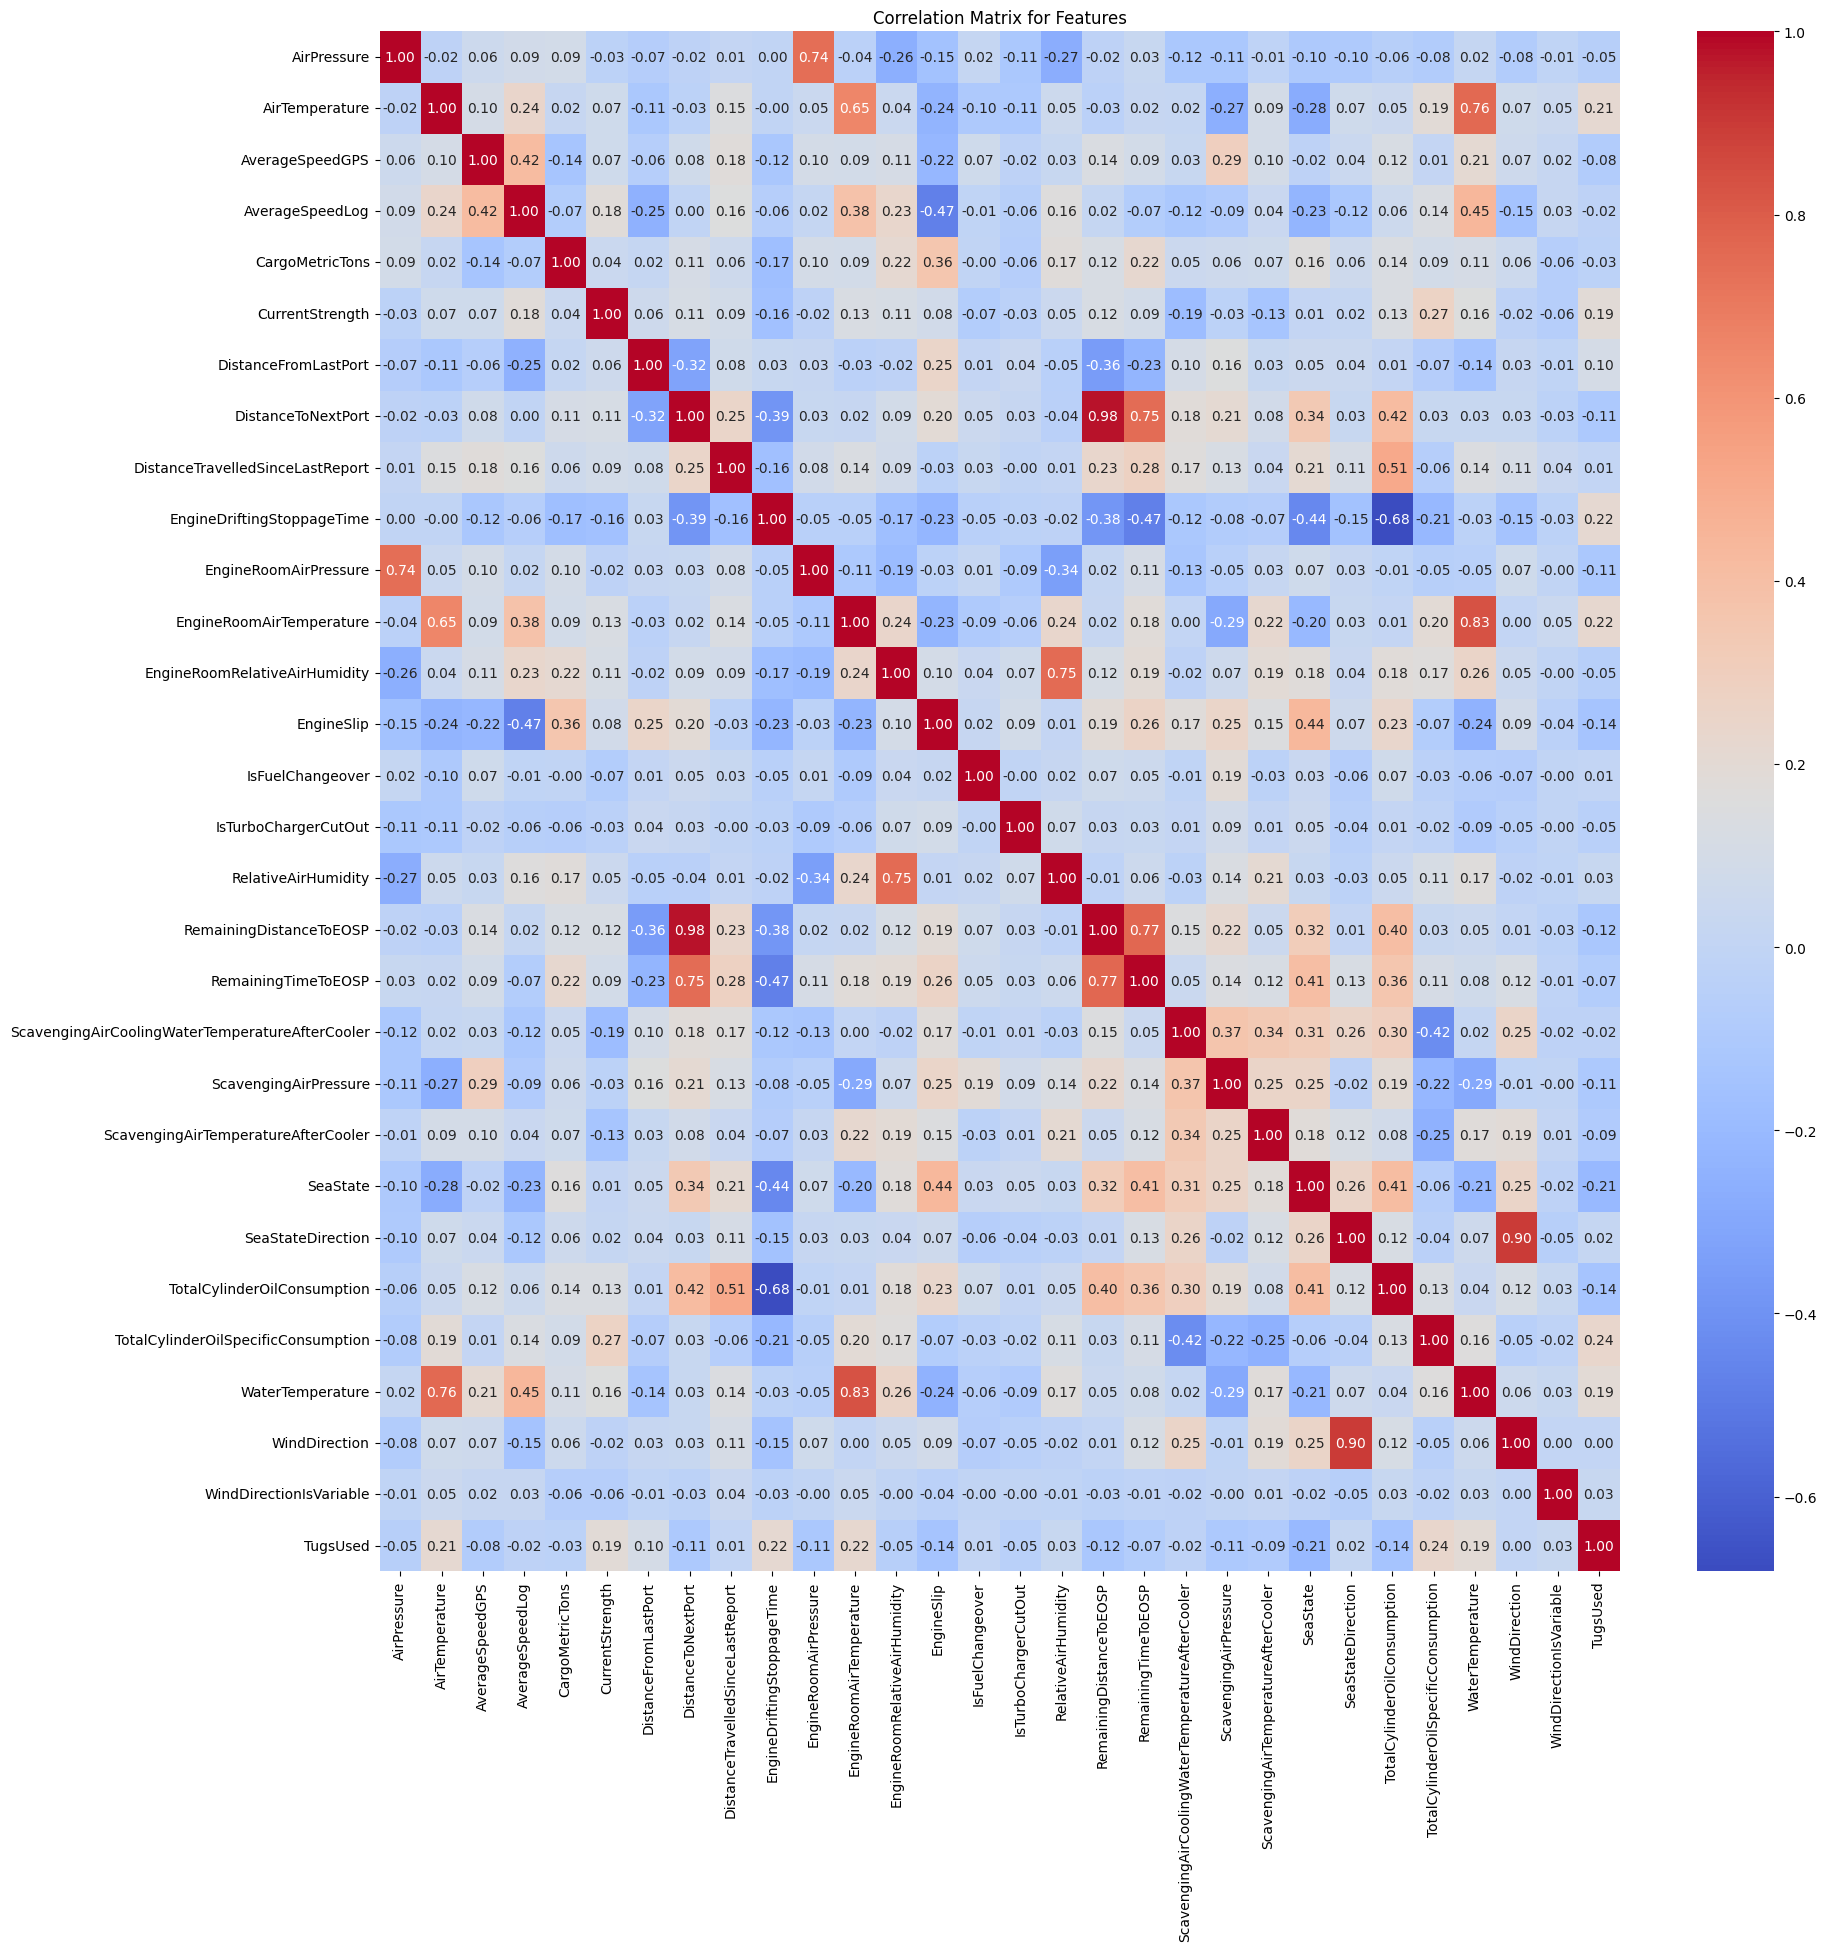

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = main_df.select_dtypes(include=[float, int]).iloc[:, :30].columns
plt.figure(figsize=(20, 20))
corr_matrix = main_df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Features")
plt.show()

# Phase 2: Feature Engineering 

### KPI Assumption : Total daily fuel consumption and Fuel consumed per nautical mile

#### Constructing Relevant Features

In [30]:
relevant_features_df = pd.DataFrame()
relevant_features_df['Sailed_Distance'] = df_new[[ 'DistanceFromLastPort', 'DistanceToNextPort', 'DistanceTravelledSinceLastReport', 'DistanceEospToFwe', 'DistanceToEosp']].select_dtypes(include=[float, int]).sum(axis=1)



relevant_features_df['Average_Speed'] = df_new[['AverageSpeedGPS', 'AverageSpeedLog']].mean(axis=1)

relevant_features_df['Wind_Speed_Direction'] = df_new[['WindDirection', 'WindDirectionIsVariable']].apply(lambda x: ', '.join(x.astype(str)), axis=1)
relevant_features_df['Sea_State'] = df_new[['SeaState', 'SeaStateDirection']].mean(axis=1)
relevant_features_df['Weather_Conditions'] = df_new[['AirPressure', 'AirTemperature', 'WaterTemperature', 'RelativeAirHumidity', 'Weather']].apply(lambda x: ', '.join(x.astype(str)), axis=1)

relevant_features_df['Cargo'] = df_new[['CargoMetricTons', 'EstimatedBunkersNextPort']].select_dtypes(include=[float, int]).sum(axis=1)

relevant_features_df.head()



Sailed_Distance  Average_Speed Wind_Speed_Direction  Sea_State  \
0      1973.000000      12.190000           141.0, 0.0      36.50   
1      2075.822555      12.146364            70.5, 0.0      18.25   
2      2232.770607      12.102727             0.0, 0.0       0.00   
3      2389.718659      12.059091             0.0, 0.0       0.00   
4      2546.666711      12.015455             0.0, 0.0       0.00   

                                  Weather_Conditions        Cargo  
0                   1016.0, 21.0, 26.0, 65.0, NORMAL      0.00000  
1  1010.5239436619719, 22.4, 25.636363636363637, ...  46428.79321  
2  1010.5239436619719, 22.4, 25.272727272727273, ...      0.00000  
3  1010.5239436619719, 22.4, 24.90909090909091, 7...      0.00000  
4  1010.5239436619719, 22.4, 24.545454545454547, ...      0.00000

In [31]:
p = list(relevant_features_df.columns)
p


['Sailed_Distance',
 'Average_Speed',
 'Wind_Speed_Direction',
 'Sea_State',
 'Weather_Conditions',
 'Cargo']

In [32]:
main_df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_13:30  \
0                      0.000000  ...                     1.0   
1                     11.041667  ...                     1.0   
2                     22.083333  ...                     1.0   
3                     24.000000  ...                     1.0   
4                     24.000000  ...                     1.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_14:30  new_TimeZoneInfo_15:30  new_TimeZoneInfo_16:30  \
0                       0.0                     0.0                     0.0   
1                       0.0                     0.0                     0.0   
2                       0.0                     0.0                     0.0   
3                       0.0                     0.0                     0.0   
4                       0.0                     0.0                     0.0   
..                      ...                     ...                     ...   
680                     0.0                     0.0                     0.0   
681                     0.0                     0.0                     0.0   
682                     0.0                     0.0                     0.0   
683                     0.0                     0.0                     0.0   
684                     0.0         

#### Combining fuel consumption array for Total Fuel Consumption Prediction

In [33]:
main_df["TotalConsumption"] = main_df["Consumption"]+main_df["TotalCylinderOilConsumption"]+main_df['TotalCylinderOilSpecificConsumption']
main_df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_14:30  \
0                      0.000000  ...                     0.0   
1                     11.041667  ...                     0.0   
2                     22.083333  ...                     0.0   
3                     24.000000  ...                     0.0   
4                     24.000000  ...                     0.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_15:30  new_TimeZoneInfo_16:30  new_TimeZoneInfo_17:30  \
0                       0.0                     0.0                     0.0   
1                       0.0                     0.0                     0.0   
2                       0.0                     0.0                     0.0   
3                       0.0                     0.0                     0.0   
4                       0.0                     0.0                     0.0   
..                      ...                     ...                     ...   
680                     0.0                     0.0                     0.0   
681                     0.0                     0.0                     0.0   
682                     0.0                     0.0                     0.0   
683                     0.0                     0.0                     0.0   
684                     0.0         

In [34]:
main_df['FuelPerNauticalMile'] = main_df['TotalConsumption'] / main_df['SailedDistance']
main_df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_15:30  \
0                      0.000000  ...                     0.0   
1                     11.041667  ...                     0.0   
2                     22.083333  ...                     0.0   
3                     24.000000  ...                     0.0   
4                     24.000000  ...                     0.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_16:30  new_TimeZoneInfo_17:30  new_TimeZoneInfo_3:30  \
0                       0.0                     0.0                    0.0   
1                       0.0                     0.0                    0.0   
2                       0.0                     0.0                    0.0   
3                       0.0                     0.0                    0.0   
4                       0.0                     0.0                    0.0   
..                      ...                     ...                    ...   
680                     0.0                     0.0                    0.0   
681                     0.0                     0.0                    0.0   
682                     0.0                     0.0                    0.0   
683                     0.0                     0.0                    1.0   
684                     0.0                    

In [35]:
main_df1 = pd.DataFrame(main_df)
main_df1.to_csv("Final Updated dataset used for Model Building.csv", index=False)
print("\nFinal Updated data after encoding saved as Final Updated dataset used for Model Building  '.csv'")


Final Updated data after encoding saved as Final Updated dataset used for Model Building  '.csv'


# Phase 3: Model Building

### KPI-1: Total daily Fuel consumption

#### Using PCA


In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
scaling = StandardScaler()
numeric_df = main_df.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')

numeric_df_imputed = imputer.fit_transform(numeric_df)

scaling.fit(numeric_df_imputed)
Scaled_data = scaling.transform(numeric_df_imputed)

principal= PCA(n_components= 35)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)
x

array([[-0.81211424,  1.01410523, -1.42293092, ...,  0.40895024,
        -0.80995716, -0.28718764],
       [-1.62501272,  0.83995503, -1.60100528, ...,  0.54646486,
         0.35896841,  0.21955491],
       [-3.23913231,  0.48990049, -1.69337967, ...,  0.1905941 ,
        -0.27188966,  0.43122151],
       ...,
       [ 3.43710803, -2.23370362,  0.74493781, ..., -0.34861628,
         0.8706502 , -0.5219362 ],
       [ 2.79894739, -2.31543578,  0.8328525 , ..., -0.1530954 ,
        -0.01069767, -0.1349152 ],
       [ 2.18098998, -2.85522124,  1.28277184, ...,  0.12242826,
        -0.3166815 ,  0.02327076]])

### Train-Test Split

In [37]:
pre_processed = pd.DataFrame(x)
pre_processed

0         1         2         3         4         5         6   \
0   -0.812114  1.014105 -1.422931  1.638805  0.992988  0.611692 -0.211171   
1   -1.625013  0.839955 -1.601005  1.063789  0.567163  1.331584  0.815831   
2   -3.239132  0.489900 -1.693380  1.011702  0.578359  0.502061  1.478338   
3   -3.237310  0.502106 -1.657871  0.947115  0.424529  0.440672  1.474270   
4   -3.167684  0.542462 -1.644406  0.911049  0.286859  0.410940  1.463654   
..        ...       ...       ...       ...       ...       ...       ...   
680  4.130394 -4.179312  1.657853  2.315842 -4.139916 -2.224705 -1.853035   
681  3.952336 -2.794958  0.801795  1.885215 -4.637333 -3.102707 -0.554953   
682  3.437108 -2.233704  0.744938  1.933361 -2.923942 -2.667018  0.547256   
683  2.798947 -2.315436  0.832853  2.065198 -2.305957 -2.222422  0.078451   
684  2.180990 -2.855221  1.282772  4.054622  1.009088 -1.122311 -0.022289   

           7         8         9   ...        25        26        27  \
0    1.408916  0.409617  0.291123  ... -0.473814 -0.556657 -0.132685   
1    0.371928 -0.011717 -0.050982  ... -0.542060 -1.112342 -0.346001   
2   -0.663838 -0.463196 -0.237156  ... -0.289025 -1.012234  0.156012   
3   -0.717710 -0.445804 -0.308794  ... -0.170732 -0.941708  0.273284   
4   -0.776006 -0.421763 -0.416890  ... -0.018231 -0.949377  0.359610   
..        ...       ...       ...  ...       ...       ...       ...   
680 -1.030223 -0.408576  0.077778  ... -0.250676 -0.620000 -0.311288   
681 -0.621075  1.020849  0.152676  ...  1.009876  2.560269 -0.330516   
682  0.609872  1.174096  0.417920  ...  1.008505  2.355401 -0.161324   
683  0.883039  0.797819  0.513905  ... -2.001857  0.414831 -0.481546   
684  2.240922 -0.250694  1.049972  ... -2.158987 -0.267003 -0.649056   

           28        29        30        31        32        33        34  
0    0.792265  0.158659 -1.564971 -0.162585  0.408950 -0.809957 -0.287188  
1    1.065252 -0.134066 -1.201714  0.894627  0.546465  0.358968  0.219555  
2    1.432033 -0.243268 -1.220718  0.362193  0.190594 -0.271890  0.431222  
3    1.373373 -0.224486 -1.057919  0.114784  0.206249 -0.428382  0.601334  
4    1.229494 -0.223834 -0.885868 -0.106898  0.217098 -0.573848  0.742793  
..        ...       ...       ...       ...       ...       ...       ...  
680 -0.823030 -0.273683  0.684060 -0.390869 -0.210549 -1.210845 -0.402640  
681 -0.277698 -1.046461  0.619418  2.260930 -0.262502  1.533143 -0.393882  
682 -0.295592 -1.071500  0.768533  1.720636 -0.348616  0.870650 -0.521936  
683 -0.849583  1.635148  1.487246  0.918780 -0.153095 -0.010698 -0.134915  
684 -0.970034  1.228894  0.475440  0.751597  0.122428 -0.316681  0.023271  

[685 rows x 35 columns]

In [38]:
label = main_df["TotalConsumption"]
labels = scaling.fit_transform(label.values.reshape(-1, 1))
labels

array([[ 0.8501422 ],
       [ 0.        ],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.86238662],
       [ 0.86238662],
       [ 0.86238662],
       [ 0.86238662],
       [ 0.86340699],
       [-1.1905952 ],
       [ 0.86340699],
       [ 0.86340699],
       [ 0.86340699],
       [ 0.86340699],
       [ 0.45525951],
       [-0.76918293],
       [-1.1905952 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.36103545],
       [ 0.86340699],
       [-0.15696171],
       [-1.17733041],
       [-1.1905952 ],
       [-0.56510919],
       [ 0.04711203],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.97325667],
       [ 0.86340699],
       [ 0.86340699],
       [ 0.86340699],
       [ 0

In [39]:
from sklearn.model_selection import train_test_split
X = pre_processed
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#### Baseline Predictive Model

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Multi-layer Perceptron": MLPRegressor(),
}


model_name = "Linear Regression"
model = models[model_name]
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [42]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

model_results = []
for model_name, model in models.items():
    # Fit the model before predicting
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_results.append([model_name, mse, r2])

results_df = pd.DataFrame(model_results, columns=['Model', 'Mean Squared Error', 'R-squared'])
print(results_df)

c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConv

                          Model  Mean Squared Error  R-squared
0             Linear Regression            0.046013   0.952996
1                         Ridge            0.045927   0.953083
2                         Lasso            0.591243   0.396016
3                   Elastic Net            0.454729   0.535472
4                Bayesian Ridge            0.045595   0.953422
5   Stochastic Gradient Descent            0.045957   0.953052
6                 Decision Tree            0.351868   0.640549
7                 Random Forest            0.117136   0.880340
8             Gradient Boosting            0.082968   0.915244
9                      AdaBoost            0.179731   0.816396
10    Support Vector Regression            0.048491   0.950464
11          K-Nearest Neighbors            0.249425   0.745200
12       Multi-layer Perceptron            0.056683   0.942096


##### Hyperparameter Tuning & Validation

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVR 
import pickle

param_grids = {
    "Linear Regression": {},  
    "Ridge": {'alpha': [0.1, 1.0, 10.0]},
    "Lasso": {'alpha': [0.1, 1.0, 10.0]},
    "Elastic Net": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    "Bayesian Ridge": {},  
    "Stochastic Gradient Descent": {'alpha': [0.0001, 0.001, 0.01]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Gradient Boosting": {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "Support Vector Regression": {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7]},
    "Multi-layer Perceptron": {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)], 'activation': ['relu', 'tanh']},
}

all_results = []

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    all_results.append([model_name, best_params, mse, r2])

results_df = pd.DataFrame(all_results, columns=['Model', 'Best Hyperparameters', 'Mean Squared Error', 'R-squared'])
results_df


Tuning hyperparameters for Linear Regression...
Tuning hyperparameters for Ridge...
Tuning hyperparameters for Lasso...
Tuning hyperparameters for Elastic Net...
Tuning hyperparameters for Bayesian Ridge...
Tuning hyperparameters for Stochastic Gradient Descent...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Random Forest...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Tuning hyperparameters for Gradient Boosting...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Tuning hyperparameters for AdaBoost...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for Support Vector Regression...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Multi-layer Perceptron...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model  \
0             Linear Regression   
1                         Ridge   
2                         Lasso   
3                   Elastic Net   
4                Bayesian Ridge   
5   Stochastic Gradient Descent   
6                 Decision Tree   
7                 Random Forest   
8             Gradient Boosting   
9                      AdaBoost   
10    Support Vector Regression   
11          K-Nearest Neighbors   
12       Multi-layer Perceptron   

                                 Best Hyperparameters  Mean Squared Error  \
0                                                  {}            0.046013   
1                                     {'alpha': 10.0}            0.045247   
2                                      {'alpha': 0.1}            0.117932   
3                     {'alpha': 0.1, 'l1_ratio': 0.1}            0.045350   
4                                                  {}            0.045595   
5                                     {'alpha': 0.01}            0.045134   
6          {'max_depth': 20, 'min_samples_split': 10}            0.334798   
7   {'max_depth': 20, 'min_samples_split': 5, 'n_e...            0.113093   
8         {'learning_rate': 0.1, 'n_estimators': 300}            0.073070   
9         {'learning_rate': 1.0, 'n_estimators': 100}            0.178043   
10                       {'C': 10.0, 'kernel': 'rbf'}            0.051021   
11                                 {'n_neighbors': 3}            0.257548   
12  {'activation': 'tanh', 'hidden_layer_sizes': (...            0.033543   

    R-squared  
0    0.952996  
1    0.953778  
2    0.879526  
3    0.953672  
4    0.953422  
5    0.953893  
6    0.657987  
7    0.884470  
8    0.925355  
9    0.818120  
10   0.947880  
11   0.736902  
12   0.965735

#### Feature Importance using SHAP

  0%|          | 0/137 [00:00<?, ?it/s]

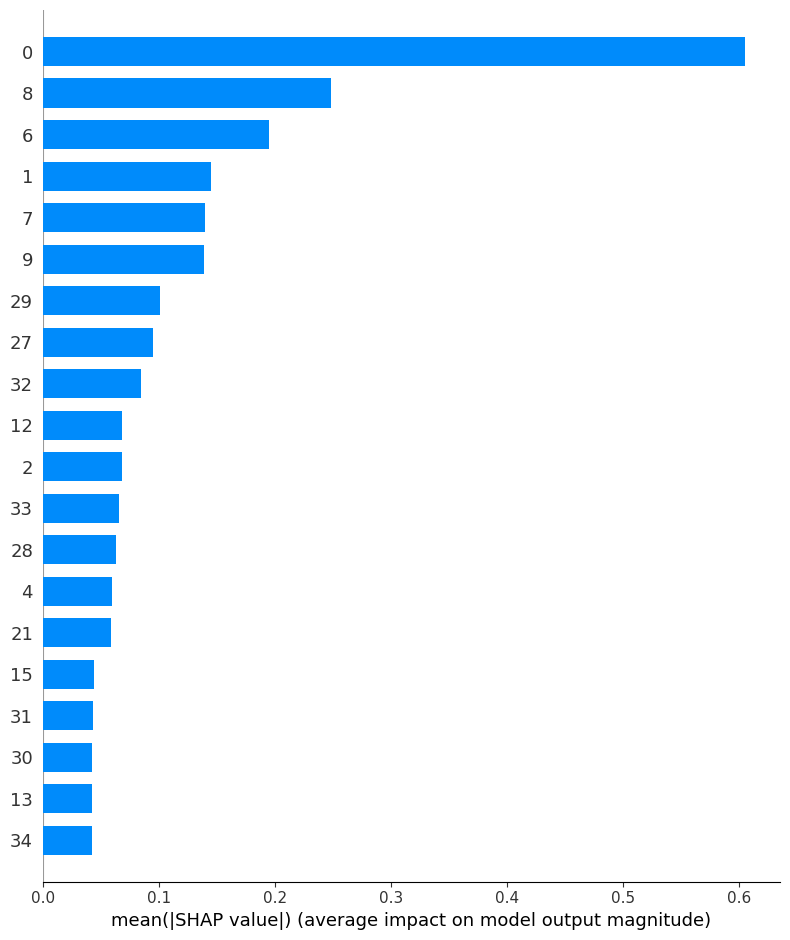

In [44]:
import shap

explainer = shap.KernelExplainer(best_model.predict, X_train[:100]) 

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


 ##### Permutation importance

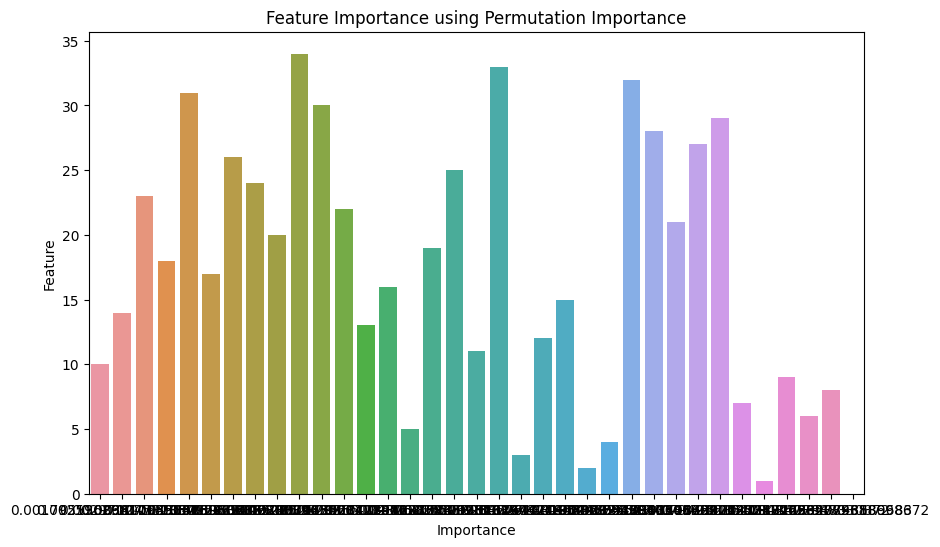

In [45]:
from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=0)

perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title("Feature Importance using Permutation Importance")
plt.show()


### Without Using PCA

In [46]:
from sklearn.model_selection import train_test_split
X = main_df.drop(['TotalConsumption'], axis=1)
y = main_df['TotalConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [47]:
models1 = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Multi-layer Perceptron": MLPRegressor(),
}

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


model_name = "Linear Regression"
model = models1[model_name]
model.fit(X_train, y_train)
predictions = model.predict(X_test)

c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['EtaNextPort' 'ReportTypeIDCode' 'UtcTime' 'EstimatedTimeOfDeparture'
 'FinishedWithEngineTime' 'EstimatedBunkersNextPort'
 'EstimatedTimeOfArrival' 'StandByEngineTime' 'new_FromPortCode'
 'new_ToPortCode' 'Weather']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['EtaNextPort' 'ReportTypeIDCode' 'UtcTime' 'EstimatedTimeOfDeparture'
 'FinishedWithEngineTime' 'EstimatedBunkersNextPort'
 'EstimatedTimeOfArrival' 'StandByEngineTime' 'new_FromPortCode'
 'new_ToPortCode' 'Weather']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [48]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

model_results = []
for model_name, model in models1.items():
    # Fit the model before predicting
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_results.append([model_name, mse, r2])

results_df = pd.DataFrame(model_results, columns=['Model', 'Mean Squared Error', 'R-squared'])
print(results_df)

c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


                          Model  Mean Squared Error     R-squared
0             Linear Regression        5.034790e-24  1.000000e+00
1                         Ridge        2.116390e-04  9.999999e-01
2                         Lasso        3.589623e-02  9.999846e-01
3                   Elastic Net        3.384254e-02  9.999855e-01
4                Bayesian Ridge        1.264702e-14  1.000000e+00
5   Stochastic Gradient Descent        9.956331e+47 -4.263583e+44
6                 Decision Tree        6.472594e-01  9.997228e-01
7                 Random Forest        5.410401e-01  9.997683e-01
8             Gradient Boosting        1.910571e-01  9.999182e-01
9                      AdaBoost        8.614396e+00  9.963111e-01
10          K-Nearest Neighbors        2.016421e+03  1.365115e-01
11       Multi-layer Perceptron        1.213023e+07 -5.193510e+03


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV 
import pickle


param_grids = {
    "Linear Regression": {},
    "Ridge": {'alpha': [0.1, 1.0, 10.0]},
    "Lasso": {'alpha': [0.1, 1.0, 10.0]},
    "Elastic Net": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    "Bayesian Ridge": {},  
    "Stochastic Gradient Descent": {'alpha': [0.0001, 0.001, 0.01]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Gradient Boosting": {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7]},
    "Multi-layer Perceptron": {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)], 'activation': ['relu', 'tanh']},
}

all_results = []
for model_name, model in models1.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    with open(f'{model_name}_best_model_Total_Consumption.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    
    all_results.append([model_name, best_params, mse, r2])

results_df = pd.DataFrame(all_results, columns=['Model', 'Best Hyperparameters', 'Mean Squared Error', 'R-squared'])
results_df


Tuning hyperparameters for Linear Regression...
Tuning hyperparameters for Ridge...
Tuning hyperparameters for Lasso...
Tuning hyperparameters for Elastic Net...
Tuning hyperparameters for Bayesian Ridge...
Tuning hyperparameters for Stochastic Gradient Descent...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for Gradient Boosting...
Tuning hyperparameters for AdaBoost...
Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Multi-layer Perceptron...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model  \
0             Linear Regression   
1                         Ridge   
2                         Lasso   
3                   Elastic Net   
4                Bayesian Ridge   
5   Stochastic Gradient Descent   
6                 Decision Tree   
7                 Random Forest   
8             Gradient Boosting   
9                      AdaBoost   
10          K-Nearest Neighbors   
11       Multi-layer Perceptron   

                                 Best Hyperparameters  Mean Squared Error  \
0                                                  {}        5.034790e-24   
1                                      {'alpha': 0.1}        2.643391e-06   
2                                      {'alpha': 0.1}        2.708480e-02   
3                     {'alpha': 0.1, 'l1_ratio': 0.1}        1.772250e-02   
4                                                  {}        1.264702e-14   
5                                     {'alpha': 0.01}        3.536652e+47   
6          {'max_depth': 10, 'min_samples_split': 10}        8.024446e-01   
7   {'max_depth': 10, 'min_samples_split': 5, 'n_e...        5.090090e-01   
8         {'learning_rate': 0.1, 'n_estimators': 300}        1.920753e-01   
9         {'learning_rate': 1.0, 'n_estimators': 100}        5.299267e+00   
10                                 {'n_neighbors': 3}        1.985715e+03   
11  {'activation': 'tanh', 'hidden_layer_sizes': (...        7.487703e+03   

       R-squared  
0   1.000000e+00  
1   1.000000e+00  
2   9.999884e-01  
3   9.999924e-01  
4   1.000000e+00  
5  -1.514495e+44  
6   9.996564e-01  
7   9.997820e-01  
8   9.999177e-01  
9   9.977307e-01  
10  1.496605e-01  
11 -2.206446e+00

In [50]:
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, max_depth=8, n_jobs=2)
xgb_model.fit(X_train, y_train)

xgb_y_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print('Decision Tree Model Metrics:')
print(f'RMSE: {xgb_rmse}')
print(f'MAE: {xgb_mae}')
print(f'MAPE: {xgb_mape}')
print(f'R2: {xgb_r2}')

Decision Tree Model Metrics:
RMSE: 0.48951588616323827
MAE: 0.08958563869110502
MAPE: 0.0007644999634932459
R2: 0.9998973854550456


### KPI-2 : Fuel consumed per nautical mile

### Using PCA


### Train-Test Split

In [51]:
label = main_df['FuelPerNauticalMile']
labels = scaling.fit_transform(label.values.reshape(-1, 1))
labels

array([[-4.43120245e-01],
       [-3.34798393e-01],
       [-5.09549751e-01],
       [-4.95285747e-01],
       [-3.43136367e-01],
       [ 1.89386463e-01],
       [-3.69762508e-01],
       [-4.95285747e-01],
       [ 4.88999774e-01],
       [-4.67669065e-01],
       [ 1.22867256e-01],
       [-5.65153434e-01],
       [ 3.63977877e-01],
       [ 5.23085617e+00],
       [-4.21002493e-01],
       [-1.60015810e-01],
       [-5.58411554e-01],
       [-3.93028684e-01],
       [ 8.51093627e-01],
       [-4.82398529e-01],
       [-1.22567312e-01],
       [-1.79623330e-01],
       [ 4.25027816e-01],
       [ 5.88778586e-01],
       [ 2.69320263e-01],
       [ 1.22867256e-01],
       [-4.00179200e-01],
       [-4.29019258e-01],
       [-4.85100641e-01],
       [-5.19608975e-01],
       [ 1.80920680e+00],
       [-3.69762508e-01],
       [-4.45320977e-01],
       [ 1.62691283e+00],
       [-5.96651225e-01],
       [-4.25062956e-01],
       [-4.59625736e-01],
       [-5.81853498e-01],
       [ 4.8

In [52]:
from sklearn.model_selection import train_test_split
X = pre_processed
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#### Baseline Predictive Model

In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Multi-layer Perceptron": MLPRegressor(),
}


model_name = "Linear Regression"
model = models[model_name]
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [54]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

model_results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_results.append([model_name, mse, r2])

results_df = pd.DataFrame(model_results, columns=['Model', 'Mean Squared Error', 'R-squared'])
print(results_df)

c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConv

                          Model  Mean Squared Error  R-squared
0             Linear Regression            0.121373   0.817199
1                         Ridge            0.121113   0.817589
2                         Lasso            0.677992  -0.021135
3                   Elastic Net            0.607784   0.084606
4                Bayesian Ridge            0.119443   0.820105
5   Stochastic Gradient Descent            0.120657   0.818276
6                 Decision Tree            0.300003   0.548161
7                 Random Forest            0.260408   0.607795
8             Gradient Boosting            0.193498   0.708570
9                      AdaBoost            0.405538   0.389212
10    Support Vector Regression            0.183110   0.724215
11          K-Nearest Neighbors            0.467319   0.296162
12       Multi-layer Perceptron            0.108921   0.835952


##### Hyperparameter Tuning & Validation

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV 
import pickle


param_grids = {
    "Linear Regression": {},  
    "Ridge": {'alpha': [0.1, 1.0, 10.0]},
    "Lasso": {'alpha': [0.1, 1.0, 10.0]},
    "Elastic Net": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    "Bayesian Ridge": {}, 
    "Stochastic Gradient Descent": {'alpha': [0.0001, 0.001, 0.01]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Gradient Boosting": {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "Support Vector Regression": {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7]},
    "Multi-layer Perceptron": {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)], 'activation': ['relu', 'tanh']},
}

all_results = []

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

   
    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    all_results.append([model_name, best_params, mse, r2])

results_df = pd.DataFrame(all_results, columns=['Model', 'Best Hyperparameters', 'Mean Squared Error', 'R-squared'])
results_df


Tuning hyperparameters for Linear Regression...
Tuning hyperparameters for Ridge...
Tuning hyperparameters for Lasso...
Tuning hyperparameters for Elastic Net...
Tuning hyperparameters for Bayesian Ridge...
Tuning hyperparameters for Stochastic Gradient Descent...
Tuning hyperparameters for Decision Tree...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for Random Forest...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Tuning hyperparameters for Gradient Boosting...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Tuning hyperparameters for AdaBoost...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for Support Vector Regression...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Multi-layer Perceptron...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model  \
0             Linear Regression   
1                         Ridge   
2                         Lasso   
3                   Elastic Net   
4                Bayesian Ridge   
5   Stochastic Gradient Descent   
6                 Decision Tree   
7                 Random Forest   
8             Gradient Boosting   
9                      AdaBoost   
10    Support Vector Regression   
11          K-Nearest Neighbors   
12       Multi-layer Perceptron   

                                 Best Hyperparameters  Mean Squared Error  \
0                                                  {}            0.121373   
1                                     {'alpha': 10.0}            0.119004   
2                                      {'alpha': 0.1}            0.206739   
3                     {'alpha': 0.1, 'l1_ratio': 0.1}            0.110872   
4                                                  {}            0.119443   
5                                   {'alpha': 0.0001}            0.115870   
6         {'max_depth': None, 'min_samples_split': 2}            0.369711   
7   {'max_depth': None, 'min_samples_split': 2, 'n...            0.265886   
8         {'learning_rate': 0.1, 'n_estimators': 300}            0.180181   
9          {'learning_rate': 0.1, 'n_estimators': 50}            0.358148   
10                       {'C': 10.0, 'kernel': 'rbf'}            0.135949   
11                                 {'n_neighbors': 7}            0.451864   
12  {'activation': 'relu', 'hidden_layer_sizes': (...            0.054365   

    R-squared  
0    0.817199  
1    0.820765  
2    0.688626  
3    0.833014  
4    0.820105  
5    0.825486  
6    0.443171  
7    0.599544  
8    0.728626  
9    0.460588  
10   0.795245  
11   0.319440  
12   0.918120

  0%|          | 0/137 [00:00<?, ?it/s]

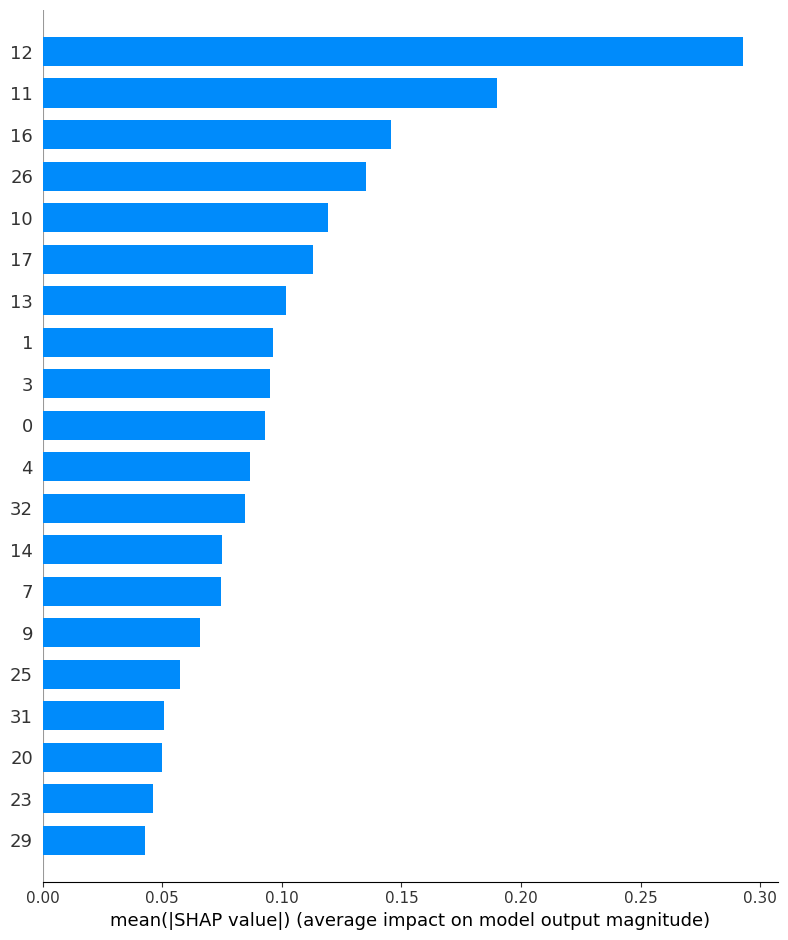

In [56]:
import shap

explainer = shap.KernelExplainer(best_model.predict, X_train[:100])  # Using a sample for KernelExplainer

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


 ##### Permutation importance

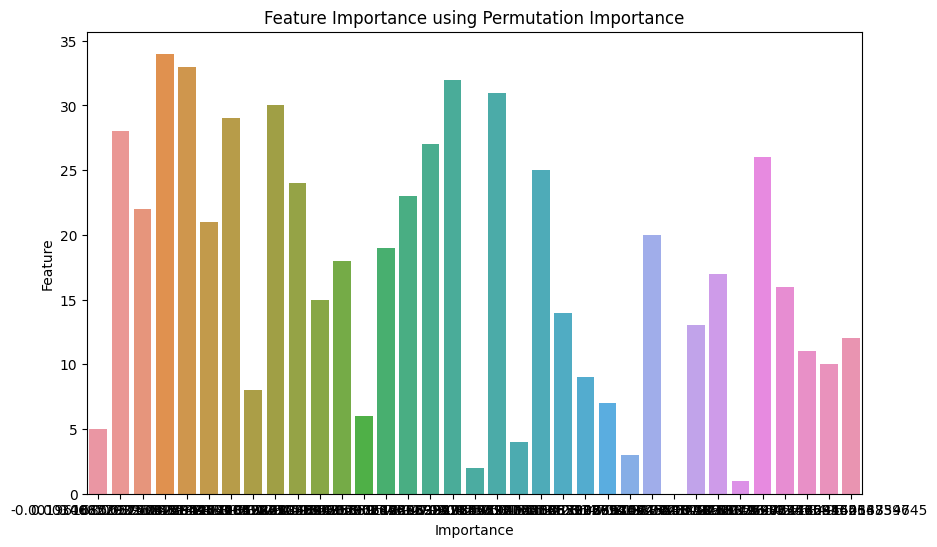

In [57]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=0)

perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title("Feature Importance using Permutation Importance")
plt.show()


# Without Using PCA


In [58]:
from sklearn.model_selection import train_test_split
X = main_df.drop(['FuelPerNauticalMile'], axis=1)
y = main_df['FuelPerNauticalMile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
feature_names = X_train.columns.tolist()

In [59]:
X_train

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
182  1010.523944            22.4         8.693636        15.030000   
267  1010.523944            22.4        11.420000        11.372000   
308  1010.523944            22.4        19.907143        10.907500   
334  1010.523944            22.4        11.162105        12.430000   
293  1010.000000            31.0        12.420000        12.880000   
..           ...             ...              ...              ...   
496  1010.523944            22.4        11.181250        11.277500   
234   973.000000             0.0         6.390000         6.520000   
34   1010.523944            22.4         9.323750        14.113333   
222  1010.523944            22.4         9.445000        11.748000   
236   986.000000             2.0         2.350000         0.220000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
182      88000.00000         1.400000           3188.000000   
267      88638.00000         0.520000           4095.000000   
308      46428.79321         1.850000           2429.000000   
334      46428.79321         0.578947           2940.176471   
293          0.00000         1.100000           1984.000000   
..               ...              ...                   ...   
496      46428.79321         0.496250           1360.000000   
234          0.00000         0.900000           2814.000000   
34       40000.00000         1.000000            753.000000   
222          0.00000         1.320000            202.000000   
236          0.00000         1.100000           3079.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
182            4.000000                        219.731646   
267           31.000000                        219.731646   
308         2140.000000                        219.731646   
334          481.529412                        219.731646   
293         2631.000000                        298.000000   
..                  ...                               ...   
496            4.000000                        219.731646   
234         2133.000000                        147.000000   
34           -29.000000                          0.000000   
222            2.000000                        219.731646   
236         1868.000000                         54.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_14:30  \
182                    6.300000  ...                     0.0   
267                    6.700000  ...                     0.0   
308                   12.000000  ...                     0.0   
334                   24.000000  ...                     0.0   
293                    0.000000  ...                     1.0   
..                          ...  ...                     ...   
496                    1.200000  ...                     0.0   
234                    0.000000  ...                     0.0   
34                     9.833333  ...                     0.0   
222                    5.733333  ...                     0.0   
236                    0.000000  ...                     0.0   

     new_TimeZoneInfo_15:30  new_TimeZoneInfo_16:30  new_TimeZoneInfo_17:30  \
182                     0.0                     0.0                     0.0   
267                     1.0                     0.0                     0.0   
308                     0.0                     1.0                     0.0   
334                     0.0                     0.0                     0.0   
293                     0.0                     0.0                     0.0   
..                      ...                     ...                     ...   
496                     0.0                     0.0                     0.0   
234                     0.0                     0.0                     1.0   
34                      0.0                     0.0                     0.0   
222                     0.0                     0.0                     0.0   
236                     0.0         

In [60]:
model_features = feature_names
number_of_model_features = len(model_features)  

print("number_of_model_features =", number_of_model_features)
print(model_features)


number_of_model_features = 75
['AirPressure', 'AirTemperature', 'AverageSpeedGPS', 'AverageSpeedLog', 'CargoMetricTons', 'CurrentStrength', 'DistanceFromLastPort', 'DistanceToNextPort', 'DistanceTravelledSinceLastReport', 'EngineDriftingStoppageTime', 'EngineRoomAirPressure', 'EngineRoomAirTemperature', 'EngineRoomRelativeAirHumidity', 'EngineSlip', 'IsFuelChangeover', 'IsTurboChargerCutOut', 'RelativeAirHumidity', 'RemainingDistanceToEOSP', 'RemainingTimeToEOSP', 'ScavengingAirCoolingWaterTemperatureAfterCooler', 'ScavengingAirPressure', 'ScavengingAirTemperatureAfterCooler', 'SeaState', 'SeaStateDirection', 'TotalCylinderOilConsumption', 'TotalCylinderOilSpecificConsumption', 'WaterTemperature', 'WindDirection', 'WindDirectionIsVariable', 'EtaNextPort', 'ReportTypeIDCode', 'TugsUsed', 'UtcTime', 'VoyageNumber', 'DistanceEospToFwe', 'EstimatedTimeOfDeparture', 'FinishedWithEngineTime', 'TimeSteamed', 'BendingMomentsInPercent', 'DischargedSludge', 'EstimatedBunkersNextPort', 'Estimated

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [62]:
models2 = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Multi-layer Perceptron": MLPRegressor(),
}

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [63]:
X_train

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
182  1010.523944            22.4         8.693636        15.030000   
267  1010.523944            22.4        11.420000        11.372000   
308  1010.523944            22.4        19.907143        10.907500   
334  1010.523944            22.4        11.162105        12.430000   
293  1010.000000            31.0        12.420000        12.880000   
..           ...             ...              ...              ...   
496  1010.523944            22.4        11.181250        11.277500   
234   973.000000             0.0         6.390000         6.520000   
34   1010.523944            22.4         9.323750        14.113333   
222  1010.523944            22.4         9.445000        11.748000   
236   986.000000             2.0         2.350000         0.220000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
182      88000.00000         1.400000           3188.000000   
267      88638.00000         0.520000           4095.000000   
308      46428.79321         1.850000           2429.000000   
334      46428.79321         0.578947           2940.176471   
293          0.00000         1.100000           1984.000000   
..               ...              ...                   ...   
496      46428.79321         0.496250           1360.000000   
234          0.00000         0.900000           2814.000000   
34       40000.00000         1.000000            753.000000   
222          0.00000         1.320000            202.000000   
236          0.00000         1.100000           3079.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
182            4.000000                        219.731646   
267           31.000000                        219.731646   
308         2140.000000                        219.731646   
334          481.529412                        219.731646   
293         2631.000000                        298.000000   
..                  ...                               ...   
496            4.000000                        219.731646   
234         2133.000000                        147.000000   
34           -29.000000                          0.000000   
222            2.000000                        219.731646   
236         1868.000000                         54.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_14:30  \
182                    6.300000  ...                     0.0   
267                    6.700000  ...                     0.0   
308                   12.000000  ...                     0.0   
334                   24.000000  ...                     0.0   
293                    0.000000  ...                     1.0   
..                          ...  ...                     ...   
496                    1.200000  ...                     0.0   
234                    0.000000  ...                     0.0   
34                     9.833333  ...                     0.0   
222                    5.733333  ...                     0.0   
236                    0.000000  ...                     0.0   

     new_TimeZoneInfo_15:30  new_TimeZoneInfo_16:30  new_TimeZoneInfo_17:30  \
182                     0.0                     0.0                     0.0   
267                     1.0                     0.0                     0.0   
308                     0.0                     1.0                     0.0   
334                     0.0                     0.0                     0.0   
293                     0.0                     0.0                     0.0   
..                      ...                     ...                     ...   
496                     0.0                     0.0                     0.0   
234                     0.0                     0.0                     1.0   
34                      0.0                     0.0                     0.0   
222                     0.0                     0.0                     0.0   
236                     0.0         

In [64]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


# Convert to numeric and handle errors
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')

# Get remaining columns after conversion
remaining_columns = X_train_numeric.columns[X_train_numeric.notna().any()].tolist()

# Identify removed columns
removed_columns = set(model_features) - set(remaining_columns)
print("Removed Columns:", removed_columns)


Removed Columns: {'EstimatedTimeOfDeparture', 'new_ToPortCode', 'ReportTypeIDCode', 'UtcTime', 'new_FromPortCode', 'Weather', 'EstimatedBunkersNextPort', 'EstimatedTimeOfArrival', 'StandByEngineTime', 'FinishedWithEngineTime', 'EtaNextPort'}


#### Feature Importance using SHAP

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression



imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


model_name_new = "Linear Regression"
model = models2[model_name_new]
model.fit(X_train, y_train)
predictions = model.predict(X_test)

c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['EtaNextPort' 'ReportTypeIDCode' 'UtcTime' 'EstimatedTimeOfDeparture'
 'FinishedWithEngineTime' 'EstimatedBunkersNextPort'
 'EstimatedTimeOfArrival' 'StandByEngineTime' 'new_FromPortCode'
 'new_ToPortCode' 'Weather']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['EtaNextPort' 'ReportTypeIDCode' 'UtcTime' 'EstimatedTimeOfDeparture'
 'FinishedWithEngineTime' 'EstimatedBunkersNextPort'
 'EstimatedTimeOfArrival' 'StandByEngineTime' 'new_FromPortCode'
 'new_ToPortCode' 'Weather']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [66]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

model_results_final = []
for model_name_new, model in models2.items():
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_results_final.append([model_name_new, mse, r2])

results_df = pd.DataFrame(model_results_final, columns=['Model', 'Mean Squared Error', 'R-squared'])
print(results_df)

c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.302e+02, tolerance: 4.840e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


                          Model  Mean Squared Error     R-squared
0             Linear Regression        7.212940e+02  1.542260e-02
1                         Ridge        7.036763e+02  3.947102e-02
2                         Lasso        6.344998e+02  1.338980e-01
3                   Elastic Net        6.350892e+02  1.330935e-01
4                Bayesian Ridge        6.181546e+02  1.562095e-01
5   Stochastic Gradient Descent        9.956339e+47 -1.359056e+45
6                 Decision Tree        1.731459e+01  9.763653e-01
7                 Random Forest        9.280965e+00  9.873313e-01
8             Gradient Boosting        5.379251e+00  9.926572e-01
9                      AdaBoost        4.021848e+01  9.451012e-01
10          K-Nearest Neighbors        8.598521e+02 -1.737113e-01
11       Multi-layer Perceptron        3.008576e+06 -4.105752e+03


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV 
import pickle


param_grids = {
    "Linear Regression": {}, 
    "Ridge": {'alpha': [0.1, 1.0, 10.0]},
    "Lasso": {'alpha': [0.1, 1.0, 10.0]},
    "Elastic Net": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    "Bayesian Ridge": {}, 
    "Stochastic Gradient Descent": {'alpha': [0.0001, 0.001, 0.01]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Gradient Boosting": {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7]},
    "Multi-layer Perceptron": {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)], 'activation': ['relu', 'tanh']},
}


all_results_final = []

for model_name_new, model in models2.items():
    print(f"Tuning hyperparameters for {model_name_new}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name_new],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    with open(f'{model_name_new}_nautical_mile_final.pkl', 'wb') as file:
        pickle.dump(best_model, file)
       

    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    all_results_final.append([model_name_new, best_params, mse, r2])

results_df = pd.DataFrame(all_results_final, columns=['Model', 'Best Hyperparameters', 'Mean Squared Error', 'R-squared'])
results_df


Tuning hyperparameters for Linear Regression...
Tuning hyperparameters for Ridge...
Tuning hyperparameters for Lasso...
Tuning hyperparameters for Elastic Net...
Tuning hyperparameters for Bayesian Ridge...
Tuning hyperparameters for Stochastic Gradient Descent...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for Gradient Boosting...
Tuning hyperparameters for AdaBoost...
Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Multi-layer Perceptron...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


Model  \
0             Linear Regression   
1                         Ridge   
2                         Lasso   
3                   Elastic Net   
4                Bayesian Ridge   
5   Stochastic Gradient Descent   
6                 Decision Tree   
7                 Random Forest   
8             Gradient Boosting   
9                      AdaBoost   
10          K-Nearest Neighbors   
11       Multi-layer Perceptron   

                                 Best Hyperparameters  Mean Squared Error  \
0                                                  {}        7.212940e+02   
1                                     {'alpha': 10.0}        6.623604e+02   
2                                     {'alpha': 10.0}        6.121362e+02   
3                    {'alpha': 10.0, 'l1_ratio': 0.9}        6.134372e+02   
4                                                  {}        6.181546e+02   
5                                     {'alpha': 0.01}        3.524380e+47   
6           {'max_depth': 10, 'min_samples_split': 5}        3.130244e+01   
7   {'max_depth': 20, 'min_samples_split': 2, 'n_e...        9.397440e+00   
8         {'learning_rate': 0.1, 'n_estimators': 200}        5.107500e+00   
9         {'learning_rate': 0.1, 'n_estimators': 200}        3.567722e+01   
10                                 {'n_neighbors': 7}        7.887363e+02   
11  {'activation': 'tanh', 'hidden_layer_sizes': (...        7.341450e+02   

       R-squared  
0   1.542260e-02  
1   9.586785e-02  
2   1.644247e-01  
3   1.626488e-01  
4   1.562095e-01  
5  -4.810834e+44  
6   9.572717e-01  
7   9.871724e-01  
8   9.930282e-01  
9   9.513001e-01  
10 -7.663725e-02  
11 -2.119237e-03

In [68]:
y=pd.DataFrame(X_train)
y

0     1          2          3            4         5   \
0    1010.523944  22.4   8.693636  15.030000  88000.00000  1.400000   
1    1010.523944  22.4  11.420000  11.372000  88638.00000  0.520000   
2    1010.523944  22.4  19.907143  10.907500  46428.79321  1.850000   
3    1010.523944  22.4  11.162105  12.430000  46428.79321  0.578947   
4    1010.000000  31.0  12.420000  12.880000      0.00000  1.100000   
..           ...   ...        ...        ...          ...       ...   
543  1010.523944  22.4  11.181250  11.277500  46428.79321  0.496250   
544   973.000000   0.0   6.390000   6.520000      0.00000  0.900000   
545  1010.523944  22.4   9.323750  14.113333  40000.00000  1.000000   
546  1010.523944  22.4   9.445000  11.748000      0.00000  1.320000   
547   986.000000   2.0   2.350000   0.220000      0.00000  1.100000   

              6            7           8          9   ...   54   55   56   57  \
0    3188.000000     4.000000  219.731646   6.300000  ...  0.0  0.0  0.0  0.0   
1    4095.000000    31.000000  219.731646   6.700000  ...  0.0  1.0  0.0  0.0   
2    2429.000000  2140.000000  219.731646  12.000000  ...  0.0  0.0  1.0  0.0   
3    2940.176471   481.529412  219.731646  24.000000  ...  0.0  0.0  0.0  0.0   
4    1984.000000  2631.000000  298.000000   0.000000  ...  1.0  0.0  0.0  0.0   
..           ...          ...         ...        ...  ...  ...  ...  ...  ...   
543  1360.000000     4.000000  219.731646   1.200000  ...  0.0  0.0  0.0  0.0   
544  2814.000000  2133.000000  147.000000   0.000000  ...  0.0  0.0  0.0  1.0   
545   753.000000   -29.000000    0.000000   9.833333  ...  0.0  0.0  0.0  0.0   
546   202.000000     2.000000  219.731646   5.733333  ...  0.0  0.0  0.0  0.0   
547  3079.000000  1868.000000   54.000000   0.000000  ...  0.0  0.0  0.0  0.0   

      58   59   60   61   62          63  
0    0.0  0.0  0.0  0.0  0.0   70.000000  
1    0.0  0.0  0.0  0.0  0.0   70.000000  
2    0.0  0.0  0.0  0.0  0.0  128.341421  
3    0.0  0.0  0.0  0.0  0.0   70.000000  
4    0.0  0.0  0.0  0.0  0.0  170.000000  
..   ...  ...  ...  ...  ...         ...  
543  0.0  0.0  0.0  0.0  0.0   70.000000  
544  0.0  0.0  0.0  0.0  0.0  140.000000  
545  0.0  0.0  0.0  0.0  0.0   70.000000  
546  0.0  0.0  0.0  0.0  0.0   70.000000  
547  0.0  0.0  0.0  1.0  0.0   70.000000  

[548 rows x 64 columns]

In [69]:
import json

columns_new = {
    'data_columns': [col.lower() for col in X.columns]
}


with open("columns_new.json", "w") as f:
    json.dump(columns_new, f)

print("Column names saved as 'columns_new.json'")

json_features = columns_new['data_columns'] 
number_of_json_features = len(json_features)  

print("number_of_json_features =", number_of_json_features)
print(json_features)


Column names saved as 'columns_new.json'
number_of_json_features = 75
['airpressure', 'airtemperature', 'averagespeedgps', 'averagespeedlog', 'cargometrictons', 'currentstrength', 'distancefromlastport', 'distancetonextport', 'distancetravelledsincelastreport', 'enginedriftingstoppagetime', 'engineroomairpressure', 'engineroomairtemperature', 'engineroomrelativeairhumidity', 'engineslip', 'isfuelchangeover', 'isturbochargercutout', 'relativeairhumidity', 'remainingdistancetoeosp', 'remainingtimetoeosp', 'scavengingaircoolingwatertemperatureaftercooler', 'scavengingairpressure', 'scavengingairtemperatureaftercooler', 'seastate', 'seastatedirection', 'totalcylinderoilconsumption', 'totalcylinderoilspecificconsumption', 'watertemperature', 'winddirection', 'winddirectionisvariable', 'etanextport', 'reporttypeidcode', 'tugsused', 'utctime', 'voyagenumber', 'distanceeosptofwe', 'estimatedtimeofdeparture', 'finishedwithenginetime', 'timesteamed', 'bendingmomentsinpercent', 'dischargedsludge'

In [70]:
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, max_depth=8, n_jobs=2)
xgb_model.fit(X_train, y_train)

xgb_y_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print('Decision Tree Model Metrics:')
print(f'RMSE: {xgb_rmse}')
print(f'MAE: {xgb_mae}')
print(f'MAPE: {xgb_mape}')
print(f'R2: {xgb_r2}')

Decision Tree Model Metrics:
RMSE: 2.353918781693098
MAE: 0.8906463244994983
MAPE: 0.044587489920060126
R2: 0.9924365403415244


## Phase 4: Anomaly Detection 

#### Outlier Detection Using Isolation Forest

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

X = main_df.drop(['FuelPerNauticalMile'], axis=1)
X = X.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X)

main_df['IsoForest_Anomaly'] = iso_forest.predict(X)
main_df['IsoForest_Anomaly'] = main_df['IsoForest_Anomaly'].apply(lambda x: 1 if x == -1 else 0)

print("\nResults with Isolation Forest Anomalies:")
main_df



Results with Isolation Forest Anomalies:


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['EtaNextPort' 'ReportTypeIDCode' 'UtcTime' 'EstimatedTimeOfDeparture'
 'FinishedWithEngineTime' 'EstimatedBunkersNextPort'
 'EstimatedTimeOfArrival' 'StandByEngineTime' 'new_FromPortCode'
 'new_ToPortCode' 'Weather']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_16:30  \
0                      0.000000  ...                     0.0   
1                     11.041667  ...                     0.0   
2                     22.083333  ...                     0.0   
3                     24.000000  ...                     0.0   
4                     24.000000  ...                     0.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_17:30  new_TimeZoneInfo_3:30  new_TimeZoneInfo_4:30  \
0                       0.0                    0.0                    0.0   
1                       0.0                    0.0                    0.0   
2                       0.0                    0.0                    0.0   
3                       0.0                    0.0                    0.0   
4                       0.0                    0.0                    0.0   
..                      ...                    ...                    ...   
680                     0.0                    0.0                    0.0   
681                     0.0                    0.0                    1.0   
682                     0.0                    0.0                    1.0   
683                     0.0                    1.0                    0.0   
684                     0.0                    1.0        

##### Anomalous Point Detection with Isolation Forest

In [72]:
anomalous_points = main_df[main_df['IsoForest_Anomaly'] == 1]

print("\nTable of Anomalous Points:")
anomalous_points



Table of Anomalous Points:


AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
32   1010.523944            22.4          7.72000        13.860000   
42   1000.000000            27.0          9.87000        10.430000   
49   1010.523944            22.4          9.59375        13.826364   
61    999.000000            26.0          8.25000         9.620000   
65   1010.523944            22.4          5.56000        12.528333   
..           ...             ...              ...              ...   
676  1003.000000             0.0         10.25000        10.250000   
678   987.000000             3.0          7.38000         7.380000   
679   969.000000             4.0          3.83000         3.830000   
681   983.000000             8.0         11.17000        11.170000   
684  1015.000000             7.0         11.79000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
32       40000.00000         1.000000                 627.0   
42           0.00000         0.800000                 475.0   
49           0.00000         0.563636                1621.0   
61       86700.00000         1.600000                1276.0   
65       86700.00000         1.200000                1831.0   
..               ...              ...                   ...   
676      46428.79321         0.600000                2331.0   
678      46428.79321         1.000000                2768.0   
679      46428.79321         1.000000                2856.0   
681      46428.79321         1.000000                3344.0   
684      46428.79321         1.000000                4189.0   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
32                 97.0                              44.0   
42               1142.0                             227.0   
49                 -4.0                               4.0   
61                555.0                             198.0   
65                 11.0                              10.0   
..                  ...                               ...   
676              2317.0                             246.0   
678              1880.0                             177.0   
679              1798.0                              88.0   
681              1310.0                             257.0   
684               465.0                             283.0   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_16:30  \
32                    18.333333  ...                     0.0   
42                     0.000000  ...                     0.0   
49                     2.750000  ...                     0.0   
61                     0.000000  ...                     0.0   
65                     1.000000  ...                     0.0   
..                          ...  ...                     ...   
676                    0.000000  ...                     0.0   
678                    0.000000  ...                     0.0   
679                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_17:30  new_TimeZoneInfo_3:30  new_TimeZoneInfo_4:30  \
32                      0.0                    0.0                    0.0   
42                      0.0                    0.0                    0.0   
49                      0.0                    0.0                    0.0   
61                      0.0                    0.0                    0.0   
65                      0.0                    0.0                    0.0   
..                      ...                    ...                    ...   
676                     0.0                    0.0                    0.0   
678                     0.0                    0.0                    0.0   
679                     0.0                    0.0                    0.0   
681                     0.0                    0.0                    1.0   
684                     0.0                    1.0        

In [73]:
main_df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_16:30  \
0                      0.000000  ...                     0.0   
1                     11.041667  ...                     0.0   
2                     22.083333  ...                     0.0   
3                     24.000000  ...                     0.0   
4                     24.000000  ...                     0.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_17:30  new_TimeZoneInfo_3:30  new_TimeZoneInfo_4:30  \
0                       0.0                    0.0                    0.0   
1                       0.0                    0.0                    0.0   
2                       0.0                    0.0                    0.0   
3                       0.0                    0.0                    0.0   
4                       0.0                    0.0                    0.0   
..                      ...                    ...                    ...   
680                     0.0                    0.0                    0.0   
681                     0.0                    0.0                    1.0   
682                     0.0                    0.0                    1.0   
683                     0.0                    1.0                    0.0   
684                     0.0                    1.0        

#### Visualization and Validation

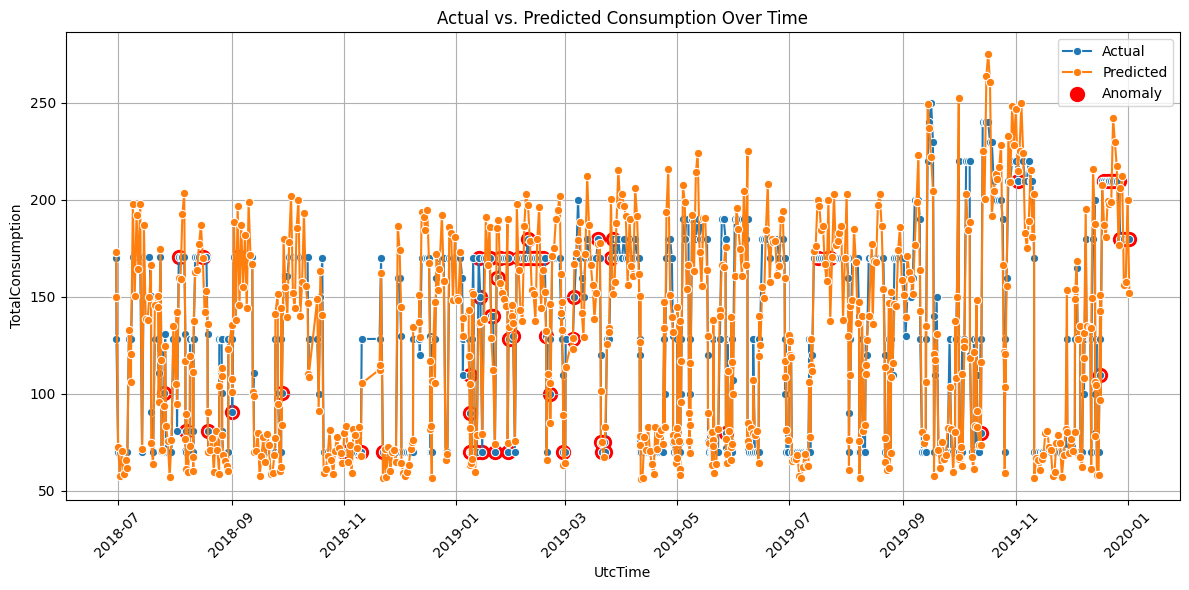

In [74]:
main_df['UtcTime'] = pd.to_datetime(main_df['UtcTime'])

if 'Predicted' not in main_df.columns:
    main_df['Predicted'] = main_df['TotalConsumption'] * np.random.uniform(0.8, 1.2, size=len(main_df))

plt.figure(figsize=(12, 6))
sns.lineplot(x='UtcTime', y='TotalConsumption', data=main_df, label='Actual', marker='o')
sns.lineplot(x='UtcTime', y='Predicted', data=main_df, label='Predicted', marker='o')


anomalies = main_df[main_df['IsoForest_Anomaly'] == 1]
plt.scatter(anomalies['UtcTime'], anomalies['TotalConsumption'], color='red', label='Anomaly', s=100)

plt.title('Actual vs. Predicted Consumption Over Time')
plt.xlabel('UtcTime')
plt.ylabel('TotalConsumption')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [75]:
df_out = main_df.replace([float('inf'), -float('inf')], float('nan'))
 
df_out = df_out.select_dtypes(include=['number'])

df_out = df_out.loc[:, (df_out != 0).any(axis=0)]
 
cols_to_drop = df_out.filter(regex='^(new_TimeZoneInfo|Energy|RunningHours|WindDirectionIsVariable|IsoForest_Anamoly|Consumption|Is|SailedDistance)').columns 
df_out = df_out.drop(cols_to_drop, axis=1)

n_columns = len(df_out.columns)
fig, ax = plt.subplots(nrows=n_columns, ncols=2, figsize=(30, 6 * n_columns))

for i, column in enumerate(df_out.columns):
    # Histogram
    sns.histplot(data=df_out, x=column, kde=True, ax=ax[i, 0])
    ax[i, 0].set_title(f'Histogram of {column}')
    
    # Boxplot
    sns.boxplot(data=df_out, x=column, ax=ax[i, 1])
    ax[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()